## Sim Demo

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from imports import *

In [3]:
# overall imports
import importlib
import data

# importlib.reload(data.data_utils)
# importlib.reload(data.data_load)
# importlib.reload(sim.sim_utils)
# importlib.reload(models)

import models
import sim.sim 
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run, open_pickled_results


#### Check job specs

In [4]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 6.3%
RAM Usage: 6.6%
Available RAM: 352.2G
Total RAM: 377.1G
52.4G


In [5]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

XGBoost version: 2.0.3
cupy version: 13.1.0


In [6]:
GPUtil.getAvailable()
# if a number is seen a GPU is available

[0]

In [7]:
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

GPU found 0


In [8]:
GPUtil.showUtilization()


| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


In [9]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

#### Simulation tests <a id="sims"></a>

Number of components for 95% variance PCA: 34
X shape: (50, 10760)
X_pca shape: (50, 34)
Y_sc shape: (50, 50)
Y_sc_spectralL shape: (50, 49)
Y_sc_spectralA shape: (50, 50)
Y_fc shape: (50, 50)
Coordinates shape: (50, 3)
Y shape (50, 50)
feature_name:  structural
processing_type:  spatial_null
[array([[-25.81979695, -32.62436548, -17.45939086, ...,   0.        ,
          7.8852    ,   5.8033    ],
       [-25.48128808, -76.59181897, -13.51436031, ...,   0.        ,
          2.8764    ,   0.        ],
       [-16.42494715, -60.9577167 ,  -6.73572939, ...,   0.        ,
          5.9596    ,   0.        ],
       ...,
       [-25.10011779,  20.33922261,  51.41342756, ...,   0.        ,
          0.        ,   0.        ],
       [-11.42649728, -55.79673321,  12.99818512, ...,   0.        ,
          0.        ,   9.0695    ],
       [ -6.58058925, -52.5407279 ,  33.1559792 , ...,   0.        ,
          9.0695    ,   0.        ]])]
X shape (50, 53)

 Test fold num: 1 X_train shape: (133

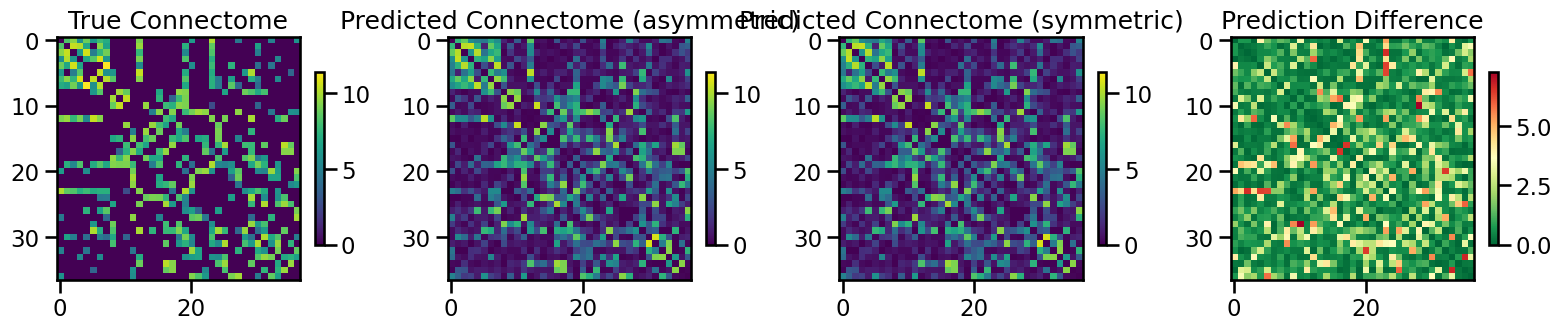

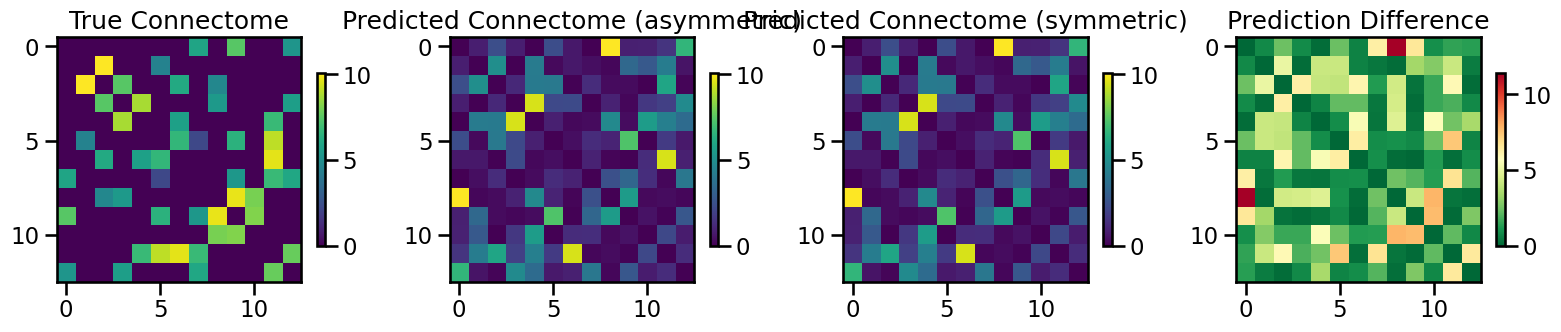

  self.comm = Comm(**args)




TRAIN METRICS: {'mse': 3.8020510078241077, 'mae': 1.3078311206133157, 'r2': 0.7118208033188914, 'pearson_corr': 0.846970147337216, 'geodesic_distance': 5.451599977424061}
TEST METRICS: {'mse': 12.809698918750424, 'mae': 2.6083750029270467, 'r2': -0.15213212421926436, 'pearson_corr': 0.27610006032012907, 'geodesic_distance': 8.487155766954656}
BEST VAL SCORE -10.145326595826848
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.3, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints'

  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.
CPU Usage: 5.1%
RAM Usage: 7.8%
Available RAM: 347.5G
Total RAM: 377.1G
| ID | GPU | MEM |
------------------
|  0 |  0% | 33% |


36008

In [22]:
# Run simulation
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='',
              feature_type=[{'structural': 'spatial_null'}],
              connectome_target='SC',
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=True,
              parcellation='S100',
              gene_list='0.2',
              hemisphere='left',
              search_method=('bayes', 'mse', 10),
              save_sim=False,
              track_wandb=True,
              skip_cv=False
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
import gc
gc.collect()

Number of components for 95% variance PCA: 34
X shape: (114, 10760)
X_pca shape: (114, 34)
Y_sc shape: (114, 114)
Y_sc_spectralL shape: (114, 113)
Y_sc_spectralA shape: (114, 114)
Y_fc shape: (114, 114)
Coordinates shape: (114, 3)
Y shape (114, 114)
feature_name:  transcriptome
processing_type:  None
[array([[0.42544076, 0.57583427, 0.51785635, ..., 0.50303074, 0.44412978,
        0.46076065],
       [0.76183907, 0.69628926, 0.72579155, ..., 0.59024527, 0.59392261,
        0.49429342],
       [0.71417305, 0.69562477, 0.72825133, ..., 0.61352548, 0.59808023,
        0.45000593],
       ...,
       [0.57512708, 0.72142576, 0.00961846, ..., 0.15718159, 0.84109162,
        0.62735449],
       [0.48100742, 0.63555783, 0.45872748, ..., 0.13799779, 0.62999409,
        0.62675189],
       [0.3324985 , 0.50435617, 0.145308  , ..., 0.24760094, 0.66816731,
        0.65529703]])]
X shape (114, 10760)

 Test fold num: 1 X_train shape: (7140, 21520) Y_train shape: (7140,) X_test shape: (812, 21520) 

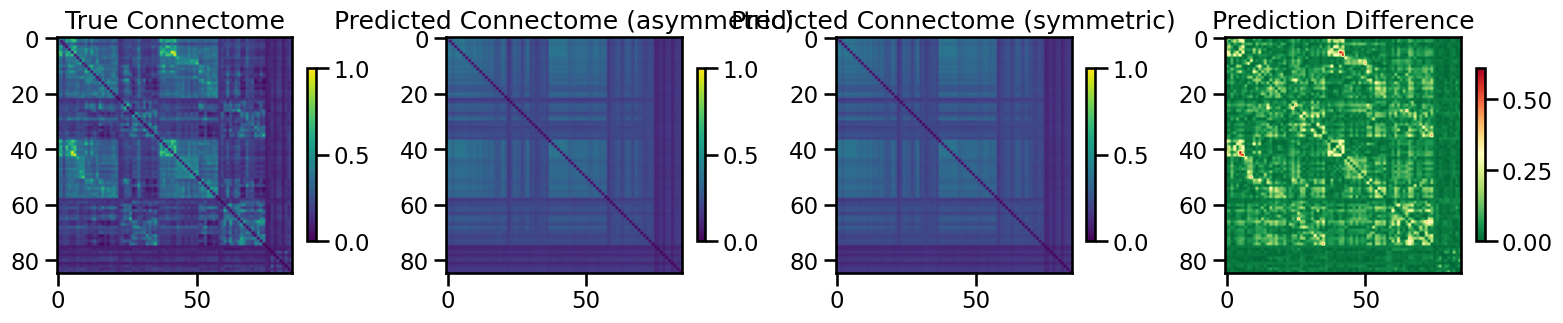

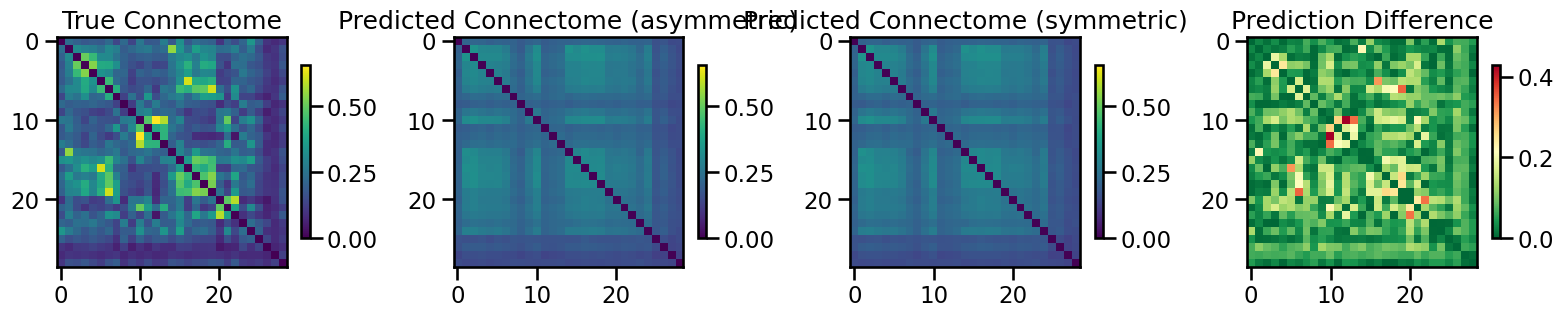

  self.comm = Comm(**args)




TRAIN METRICS: {'mse': 0.0069498520664874755, 'mae': 0.05723421250807345, 'r2': 0.5434075973206896, 'pearson_corr': 0.759155096525521, 'geodesic_distance': 8.22007540055209}
TEST METRICS: {'mse': 0.00892906277650091, 'mae': 0.0706045026629477, 'r2': 0.2967487756259811, 'pearson_corr': 0.5683283071649372, 'geodesic_distance': 6.415811132572265}
BEST VAL SCORE -0.010409281909388954
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constrai

  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.
CPU Usage: 6.3%
RAM Usage: 10.7%
Available RAM: 336.9G
Total RAM: 377.1G
| ID | GPU | MEM |
------------------
|  0 |  0% | 33% |


37907

In [13]:
# Run simulation
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='xgboost',
              feature_type=[{'transcriptome': None}],
              connectome_target='FC',
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S100',
              gene_list='0.2',
              hemisphere='both',
              search_method=('bayes', 'mse', 10),
              save_sim=False,
              track_wandb=True,
              skip_cv=False
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
import gc
gc.collect()

Number of components for 95% variance PCA: 34
X shape: (114, 10760)
X_pca shape: (114, 34)
Y_sc shape: (114, 114)
Y_sc_spectralL shape: (114, 113)
Y_sc_spectralA shape: (114, 114)
Y_fc shape: (114, 114)
Coordinates shape: (114, 3)
Y shape (114, 114)
feature_name:  transcriptome
processing_type:  PCA
[array([[ 2.67941020e+00, -4.64882102e+00, -4.72848615e+00, ...,
         6.55578575e-01, -1.44589302e+00, -7.33812074e-01],
       [-3.22990866e+00,  9.87119334e+00, -2.04543765e+00, ...,
        -4.00139629e-02, -4.99850208e-01, -1.86475065e-01],
       [-3.91671508e+00,  7.40841979e+00, -3.37479542e+00, ...,
        -1.61055929e-01, -8.22737869e-01, -1.00472318e+00],
       ...,
       [ 2.70657871e+01,  6.13609612e+00,  1.49316495e+01, ...,
         7.46871085e-01,  5.34367631e-01,  2.65283214e-01],
       [ 1.88110898e+01,  1.98372976e+00,  2.57056306e+00, ...,
        -1.56814151e-01, -3.88315207e-01, -1.94790555e-02],
       [ 2.11445564e+01,  5.36094336e+00,  6.23322850e+00, ...,
  

wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: 0qgsg1t0
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/0qgsg1t0


wandb: Agent Starting Run: bi41c9rg with config:
wandb: 	batch_size: 649
wandb: 	epochs: 107
wandb: 	input_dim: 68
wandb: 	lambda_reg: 0.07574559282700563
wandb: 	learning_rate: 0.0064633058840695
wandb: 	regularization: l2
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



  warnings.warn(



Processing inner fold 0
Number of learnable parameters in bilinear SCM layer: 1157
Epoch 10/107, Train Loss: 4.6654, Val Loss: 24.5965
Epoch 20/107, Train Loss: 1.0062, Val Loss: 12.1598
Epoch 30/107, Train Loss: 0.4886, Val Loss: 9.1228
Epoch 40/107, Train Loss: 0.2960, Val Loss: 5.3390
Epoch 50/107, Train Loss: 0.1965, Val Loss: 3.7151
Epoch 60/107, Train Loss: 0.1398, Val Loss: 2.6825
Epoch 70/107, Train Loss: 0.1036, Val Loss: 2.4525
Epoch 80/107, Train Loss: 0.0795, Val Loss: 1.4764
Epoch 90/107, Train Loss: 0.0625, Val Loss: 0.9312
Epoch 100/107, Train Loss: 0.0498, Val Loss: 0.5302
Processing inner fold 1
Number of learnable parameters in bilinear SCM layer: 1157
Epoch 10/107, Train Loss: 4.3425, Val Loss: 88.1389
Epoch 20/107, Train Loss: 1.1693, Val Loss: 48.9006
Epoch 30/107, Train Loss: 0.6255, Val Loss: 40.9220
Epoch 40/107, Train Loss: 0.4000, Val Loss: 28.7053
Epoch 50/107, Train Loss: 0.2781, Val Loss: 24.3578
Epoch 60/107, Train Loss: 0.2017, Val Loss: 17.5327
Epoch 70/

  return tuple(tensor[index] for tensor in self.tensors)



Epoch 30/107, Train Loss: 0.3639, Val Loss: 36.8608
Epoch 40/107, Train Loss: 0.2422, Val Loss: 29.6090
Epoch 50/107, Train Loss: 0.1746, Val Loss: 24.4298
Epoch 60/107, Train Loss: 0.1325, Val Loss: 16.9877
Epoch 70/107, Train Loss: 0.1028, Val Loss: 14.6167
Epoch 80/107, Train Loss: 0.0812, Val Loss: 11.8281
Epoch 90/107, Train Loss: 0.0649, Val Loss: 7.5474
Epoch 100/107, Train Loss: 0.0521, Val Loss: 6.8533


wandb: Agent Starting Run: 6vmqtdk1 with config:
wandb: 	batch_size: 1251
wandb: 	epochs: 124
wandb: 	input_dim: 68
wandb: 	lambda_reg: 0.12312891888033171
wandb: 	learning_rate: 0.0012335602383582369
wandb: 	regularization: l2
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



  warnings.warn(



Processing inner fold 0
Number of learnable parameters in bilinear SCM layer: 1157
Epoch 10/124, Train Loss: 129.9622, Val Loss: 113.2007
Epoch 20/124, Train Loss: 53.2867, Val Loss: 81.3635
Epoch 30/124, Train Loss: 27.8060, Val Loss: 61.8852
Epoch 40/124, Train Loss: 15.9266, Val Loss: 49.2109


  transposed = list(zip(*batch))  # It may be accessed twice, so we use a list.



Epoch 50/124, Train Loss: 10.1344, Val Loss: 40.2590
Epoch 60/124, Train Loss: 6.9446, Val Loss: 33.6899
Epoch 70/124, Train Loss: 5.2424, Val Loss: 28.5596
Epoch 80/124, Train Loss: 3.9286, Val Loss: 24.5501
Epoch 90/124, Train Loss: 3.1092, Val Loss: 21.2655
Epoch 100/124, Train Loss: 2.5399, Val Loss: 18.6446
Epoch 110/124, Train Loss: 2.1252, Val Loss: 16.5375
Epoch 120/124, Train Loss: 1.8130, Val Loss: 14.7938
Processing inner fold 1
Number of learnable parameters in bilinear SCM layer: 1157
Epoch 10/124, Train Loss: 239.8515, Val Loss: 127.5235
Epoch 20/124, Train Loss: 116.9864, Val Loss: 110.7221
Epoch 30/124, Train Loss: 58.5279, Val Loss: 96.7932
Epoch 40/124, Train Loss: 32.3385, Val Loss: 85.4007
Epoch 50/124, Train Loss: 19.3581, Val Loss: 76.2801
Epoch 60/124, Train Loss: 12.9629, Val Loss: 68.9202
Epoch 70/124, Train Loss: 8.9791, Val Loss: 63.0359
Epoch 80/124, Train Loss: 7.2250, Val Loss: 58.2982
Epoch 90/124, Train Loss: 5.3848, Val Loss: 54.2798
Epoch 100/124, Trai

wandb: Agent Starting Run: 6gpvrukf with config:
wandb: 	batch_size: 1666
wandb: 	epochs: 217
wandb: 	input_dim: 68
wandb: 	lambda_reg: 0.7713004495178438
wandb: 	learning_rate: 0.0009049005728908794
wandb: 	regularization: l2
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



  warnings.warn(



Processing inner fold 0
Number of learnable parameters in bilinear SCM layer: 1157
Epoch 10/217, Train Loss: 297.7318, Val Loss: 306.6051


  return tuple(tensor[index] for tensor in self.tensors)



Epoch 20/217, Train Loss: 209.7353, Val Loss: 267.3261
Epoch 30/217, Train Loss: 145.2172, Val Loss: 232.8896
Epoch 40/217, Train Loss: 102.0299, Val Loss: 203.2446
Epoch 50/217, Train Loss: 71.4344, Val Loss: 177.8576
Epoch 60/217, Train Loss: 50.8606, Val Loss: 156.2618
Epoch 70/217, Train Loss: 36.6960, Val Loss: 138.0849
Epoch 80/217, Train Loss: 27.0921, Val Loss: 122.7655
Epoch 90/217, Train Loss: 20.5580, Val Loss: 109.9938
Epoch 100/217, Train Loss: 16.0056, Val Loss: 99.2799
Epoch 110/217, Train Loss: 12.8184, Val Loss: 90.2653
Epoch 120/217, Train Loss: 10.4842, Val Loss: 82.6455
Epoch 130/217, Train Loss: 8.8653, Val Loss: 76.1684
Epoch 140/217, Train Loss: 7.6018, Val Loss: 70.5999
Epoch 150/217, Train Loss: 6.7226, Val Loss: 65.7659
Epoch 160/217, Train Loss: 5.9937, Val Loss: 61.5384
Epoch 170/217, Train Loss: 5.4162, Val Loss: 57.7788
Epoch 180/217, Train Loss: 4.9377, Val Loss: 54.4247
Epoch 190/217, Train Loss: 4.5562, Val Loss: 51.4067
Epoch 200/217, Train Loss: 4.207

wandb: Agent Starting Run: vjec4bp4 with config:
wandb: 	batch_size: 691
wandb: 	epochs: 130
wandb: 	input_dim: 68
wandb: 	lambda_reg: 0.28392708271930306
wandb: 	learning_rate: 0.00433294411718962
wandb: 	regularization: l2
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



  warnings.warn(



Processing inner fold 0
Number of learnable parameters in bilinear SCM layer: 1157
Epoch 10/130, Train Loss: 8.8565, Val Loss: 45.7986
Epoch 20/130, Train Loss: 2.4717, Val Loss: 26.8524
Epoch 30/130, Train Loss: 1.2871, Val Loss: 10.3118
Epoch 40/130, Train Loss: 0.7934, Val Loss: 7.0971
Epoch 50/130, Train Loss: 0.5405, Val Loss: 4.6939
Epoch 60/130, Train Loss: 0.3783, Val Loss: 4.5106
Epoch 70/130, Train Loss: 0.2671, Val Loss: 2.0696
Epoch 80/130, Train Loss: 0.1899, Val Loss: 1.1245
Epoch 90/130, Train Loss: 0.1336, Val Loss: 0.7653


  return tuple(tensor[index] for tensor in self.tensors)



Epoch 100/130, Train Loss: 0.0959, Val Loss: 0.3276
Epoch 110/130, Train Loss: 0.0725, Val Loss: 0.1875
Epoch 120/130, Train Loss: 0.0621, Val Loss: 0.1092
Epoch 130/130, Train Loss: 0.0575, Val Loss: 0.0811
Processing inner fold 1
Number of learnable parameters in bilinear SCM layer: 1157
Epoch 10/130, Train Loss: 13.2016, Val Loss: 98.5866
Epoch 20/130, Train Loss: 3.8013, Val Loss: 85.0670
Epoch 30/130, Train Loss: 2.2246, Val Loss: 61.1646
Epoch 40/130, Train Loss: 1.5307, Val Loss: 41.7506
Epoch 50/130, Train Loss: 1.1238, Val Loss: 43.6204
Epoch 60/130, Train Loss: 0.8443, Val Loss: 39.5692
Epoch 70/130, Train Loss: 0.6449, Val Loss: 29.0506
Epoch 80/130, Train Loss: 0.5024, Val Loss: 25.6589
Epoch 90/130, Train Loss: 0.3875, Val Loss: 19.7555
Epoch 100/130, Train Loss: 0.3046, Val Loss: 29.0784
Epoch 110/130, Train Loss: 0.2377, Val Loss: 10.1513
Epoch 120/130, Train Loss: 0.1865, Val Loss: 6.4724
Epoch 130/130, Train Loss: 0.1442, Val Loss: 4.8887
Processing inner fold 2
Number

wandb: Agent Starting Run: ywupgrhx with config:
wandb: 	batch_size: 387
wandb: 	epochs: 179
wandb: 	input_dim: 68
wandb: 	lambda_reg: 0.38783345646551787
wandb: 	learning_rate: 0.0046339107321768545
wandb: 	regularization: l2
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



  warnings.warn(



Processing inner fold 0
Number of learnable parameters in bilinear SCM layer: 1157
Epoch 10/179, Train Loss: 6.2226, Val Loss: 32.3905
Epoch 20/179, Train Loss: 2.0289, Val Loss: 12.6719
Epoch 30/179, Train Loss: 1.0532, Val Loss: 8.3364
Epoch 40/179, Train Loss: 0.6160, Val Loss: 4.4532
Epoch 50/179, Train Loss: 0.3747, Val Loss: 3.9413
Epoch 60/179, Train Loss: 0.2278, Val Loss: 1.3505
Epoch 70/179, Train Loss: 0.1401, Val Loss: 0.7903
Epoch 80/179, Train Loss: 0.0916, Val Loss: 0.7021
Epoch 90/179, Train Loss: 0.0708, Val Loss: 0.1302
Epoch 100/179, Train Loss: 0.0659, Val Loss: 0.0821


  return tuple(tensor[index] for tensor in self.tensors)



Epoch 110/179, Train Loss: 0.0650, Val Loss: 0.0734
Epoch 120/179, Train Loss: 0.0649, Val Loss: 0.0731
Epoch 130/179, Train Loss: 0.0653, Val Loss: 0.0709
Epoch 140/179, Train Loss: 0.0629, Val Loss: 0.0759
Epoch 150/179, Train Loss: 0.0628, Val Loss: 0.0759
Epoch 160/179, Train Loss: 0.0626, Val Loss: 0.0747
Epoch 170/179, Train Loss: 0.0626, Val Loss: 0.0862
Processing inner fold 1
Number of learnable parameters in bilinear SCM layer: 1157
Epoch 10/179, Train Loss: 3.9272, Val Loss: 65.3650
Epoch 20/179, Train Loss: 1.4943, Val Loss: 43.6639
Epoch 30/179, Train Loss: 0.8381, Val Loss: 29.3833
Epoch 40/179, Train Loss: 0.5035, Val Loss: 18.5434
Epoch 50/179, Train Loss: 0.2969, Val Loss: 10.2211
Epoch 60/179, Train Loss: 0.1714, Val Loss: 4.4347
Epoch 70/179, Train Loss: 0.0997, Val Loss: 1.3836
Epoch 80/179, Train Loss: 0.0699, Val Loss: 0.3335
Epoch 90/179, Train Loss: 0.0641, Val Loss: 0.1311
Epoch 100/179, Train Loss: 0.0642, Val Loss: 0.1069
Epoch 110/179, Train Loss: 0.0629, Va

wandb: Agent Starting Run: 710txwvg with config:
wandb: 	batch_size: 316
wandb: 	epochs: 158
wandb: 	input_dim: 68
wandb: 	lambda_reg: 0.27611681946797256
wandb: 	learning_rate: 0.006623320174337809
wandb: 	regularization: l2
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



  warnings.warn(



Processing inner fold 0
Number of learnable parameters in bilinear SCM layer: 1157
Epoch 10/158, Train Loss: 1.9398, Val Loss: 12.1214
Epoch 20/158, Train Loss: 0.6474, Val Loss: 6.2454
Epoch 30/158, Train Loss: 0.3112, Val Loss: 2.6114
Epoch 40/158, Train Loss: 0.1563, Val Loss: 0.8802
Epoch 50/158, Train Loss: 0.0799, Val Loss: 0.2224
Epoch 60/158, Train Loss: 0.0593, Val Loss: 0.0842
Epoch 70/158, Train Loss: 0.0592, Val Loss: 0.0741
Epoch 80/158, Train Loss: 0.0613, Val Loss: 0.0793
Epoch 90/158, Train Loss: 0.1630, Val Loss: 0.0804
Epoch 100/158, Train Loss: 0.0913, Val Loss: 0.0829
Epoch 110/158, Train Loss: 0.0555, Val Loss: 0.0777
Epoch 120/158, Train Loss: 0.0544, Val Loss: 0.0761
Epoch 130/158, Train Loss: 0.0544, Val Loss: 0.0754
Epoch 140/158, Train Loss: 0.0544, Val Loss: 0.0750
Epoch 150/158, Train Loss: 0.0543, Val Loss: 0.0752
Processing inner fold 1
Number of learnable parameters in bilinear SCM layer: 1157
Epoch 10/158, Train Loss: 2.4733, Val Loss: 77.9226
Epoch 20/1

  return tuple(tensor[index] for tensor in self.tensors)



Epoch 80/158, Train Loss: 0.1607, Val Loss: 0.1242
Epoch 90/158, Train Loss: 0.2612, Val Loss: 0.1734
Epoch 100/158, Train Loss: 1.7980, Val Loss: 0.3309
Epoch 110/158, Train Loss: 0.0914, Val Loss: 0.1906
Epoch 120/158, Train Loss: 0.0580, Val Loss: 0.1473
Epoch 130/158, Train Loss: 0.0557, Val Loss: 0.1560
Epoch 140/158, Train Loss: 0.0547, Val Loss: 0.1491
Epoch 150/158, Train Loss: 0.0558, Val Loss: 0.1487
Processing inner fold 2
Number of learnable parameters in bilinear SCM layer: 1157
Epoch 10/158, Train Loss: 1.9442, Val Loss: 92.8245
Epoch 20/158, Train Loss: 0.8077, Val Loss: 58.0300
Epoch 30/158, Train Loss: 0.4232, Val Loss: 39.5600
Epoch 40/158, Train Loss: 0.2539, Val Loss: 23.2917
Epoch 50/158, Train Loss: 0.1694, Val Loss: 9.7049
Epoch 60/158, Train Loss: 0.1489, Val Loss: 3.3745
Epoch 70/158, Train Loss: 0.1834, Val Loss: 1.7319
Epoch 80/158, Train Loss: 0.3264, Val Loss: 1.7129
Epoch 90/158, Train Loss: 30.0331, Val Loss: 12.8454
Epoch 100/158, Train Loss: 0.3523, Val

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 42lrqqho with config:
wandb: 	batch_size: 444
wandb: 	epochs: 142
wandb: 	input_dim: 68
wandb: 	lambda_reg: 0.2863991707938068
wandb: 	learning_rate: 0.008998908626441789
wandb: 	regularization: l2
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



  warnings.warn(



Processing inner fold 0
Number of learnable parameters in bilinear SCM layer: 1157
Epoch 10/142, Train Loss: 1.9377, Val Loss: 11.4835
Epoch 20/142, Train Loss: 0.5652, Val Loss: 3.8991
Epoch 30/142, Train Loss: 0.2255, Val Loss: 1.1068
Epoch 40/142, Train Loss: 0.0849, Val Loss: 0.1806
Epoch 50/142, Train Loss: 0.0577, Val Loss: 0.0740
Epoch 60/142, Train Loss: 0.0583, Val Loss: 0.0733
Epoch 70/142, Train Loss: 0.0588, Val Loss: 0.0717
Epoch 80/142, Train Loss: 0.0598, Val Loss: 0.0728


  transposed = list(zip(*batch))  # It may be accessed twice, so we use a list.



Epoch 90/142, Train Loss: 0.0615, Val Loss: 0.0728
Epoch 100/142, Train Loss: 0.0628, Val Loss: 0.0757
Epoch 110/142, Train Loss: 0.0754, Val Loss: 0.0744
Epoch 120/142, Train Loss: 0.0555, Val Loss: 0.0732
Epoch 130/142, Train Loss: 0.0553, Val Loss: 0.0726
Epoch 140/142, Train Loss: 0.0551, Val Loss: 0.0731
Processing inner fold 1
Number of learnable parameters in bilinear SCM layer: 1157
Epoch 10/142, Train Loss: 2.8158, Val Loss: 28.9361
Epoch 20/142, Train Loss: 1.0491, Val Loss: 16.5149
Epoch 30/142, Train Loss: 0.5302, Val Loss: 9.7238
Epoch 40/142, Train Loss: 0.2896, Val Loss: 4.2694
Epoch 50/142, Train Loss: 0.1548, Val Loss: 1.5779
Epoch 60/142, Train Loss: 0.0848, Val Loss: 0.4246
Epoch 70/142, Train Loss: 0.0593, Val Loss: 0.1230
Epoch 80/142, Train Loss: 0.0583, Val Loss: 0.1004
Epoch 90/142, Train Loss: 0.1199, Val Loss: 0.1272
Epoch 100/142, Train Loss: 0.0547, Val Loss: 0.1158
Epoch 110/142, Train Loss: 0.0520, Val Loss: 0.1150
Epoch 120/142, Train Loss: 0.0518, Val Lo

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: pyxysyxf with config:
wandb: 	batch_size: 438
wandb: 	epochs: 178
wandb: 	input_dim: 68
wandb: 	lambda_reg: 0.8244455342717536
wandb: 	learning_rate: 0.007236082427926213
wandb: 	regularization: l2
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



  warnings.warn(



Processing inner fold 0
Number of learnable parameters in bilinear SCM layer: 1157
Epoch 10/178, Train Loss: 8.7839, Val Loss: 35.2354


  return tuple(tensor[index] for tensor in self.tensors)



Epoch 20/178, Train Loss: 2.4450, Val Loss: 16.0672
Epoch 30/178, Train Loss: 20.0994, Val Loss: 7.9693
Epoch 40/178, Train Loss: 2.2242, Val Loss: 4.5911
Epoch 50/178, Train Loss: 0.3635, Val Loss: 1.7237
Epoch 60/178, Train Loss: 0.1904, Val Loss: 0.5246
Epoch 70/178, Train Loss: 0.1243, Val Loss: 0.1466
Epoch 80/178, Train Loss: 0.0944, Val Loss: 0.0954
Epoch 90/178, Train Loss: 3.0103, Val Loss: 0.4227
Epoch 100/178, Train Loss: 0.2481, Val Loss: 0.1411
Epoch 110/178, Train Loss: 0.0788, Val Loss: 0.0828
Epoch 120/178, Train Loss: 0.0725, Val Loss: 0.0732
Epoch 130/178, Train Loss: 0.0721, Val Loss: 0.0757
Epoch 140/178, Train Loss: 0.0708, Val Loss: 0.0753


  warnings.warn(*args, **kwargs)  # noqa: B028



Epoch 150/178, Train Loss: 0.0666, Val Loss: 0.0712
Epoch 160/178, Train Loss: 0.0676, Val Loss: 0.0706
Epoch 170/178, Train Loss: 0.0680, Val Loss: 0.0695
Processing inner fold 1
Number of learnable parameters in bilinear SCM layer: 1157
Epoch 10/178, Train Loss: 4.7924, Val Loss: 65.1092
Epoch 20/178, Train Loss: 1.9165, Val Loss: 35.7726
Epoch 30/178, Train Loss: 0.9446, Val Loss: 18.4593
Epoch 40/178, Train Loss: 0.4197, Val Loss: 6.5476
Epoch 50/178, Train Loss: 0.1754, Val Loss: 1.9520
Epoch 60/178, Train Loss: 0.0947, Val Loss: 0.2970
Epoch 70/178, Train Loss: 0.0731, Val Loss: 0.0843
Epoch 80/178, Train Loss: 0.0738, Val Loss: 0.0868
Epoch 90/178, Train Loss: 0.0740, Val Loss: 0.0882
Epoch 100/178, Train Loss: 0.0660, Val Loss: 0.0789
Epoch 110/178, Train Loss: 0.0668, Val Loss: 0.0762
Epoch 120/178, Train Loss: 0.0649, Val Loss: 0.0771
Epoch 130/178, Train Loss: 0.0667, Val Loss: 0.0757
Epoch 140/178, Train Loss: 0.0661, Val Loss: 0.0770
Epoch 150/178, Train Loss: 0.0665, Val 

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 8hoqvqid with config:
wandb: 	batch_size: 263
wandb: 	epochs: 127
wandb: 	input_dim: 68
wandb: 	lambda_reg: 6.573496351059915
wandb: 	learning_rate: 0.004875153653916618
wandb: 	regularization: l2
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



  warnings.warn(



Processing inner fold 0
Number of learnable parameters in bilinear SCM layer: 1157
Epoch 10/127, Train Loss: 6.3847, Val Loss: 16.7297


  warnings.warn(*args, **kwargs)  # noqa: B028



Epoch 20/127, Train Loss: 0.1876, Val Loss: 0.1324
Epoch 30/127, Train Loss: 0.0913, Val Loss: 0.0905
Epoch 40/127, Train Loss: 0.0923, Val Loss: 0.0919
Epoch 50/127, Train Loss: 0.0935, Val Loss: 0.0905
Epoch 60/127, Train Loss: 0.0949, Val Loss: 0.0908
Epoch 70/127, Train Loss: 0.0713, Val Loss: 0.0657
Epoch 80/127, Train Loss: 0.0715, Val Loss: 0.0647
Epoch 90/127, Train Loss: 0.0716, Val Loss: 0.0710
Epoch 100/127, Train Loss: 0.0717, Val Loss: 0.0707
Epoch 110/127, Train Loss: 0.0693, Val Loss: 0.0747
Epoch 120/127, Train Loss: 0.0688, Val Loss: 0.0748
Processing inner fold 1
Number of learnable parameters in bilinear SCM layer: 1157
Epoch 10/127, Train Loss: 6.0208, Val Loss: 17.3517
Epoch 20/127, Train Loss: 0.2269, Val Loss: 0.2007
Epoch 30/127, Train Loss: 0.0909, Val Loss: 0.1035


  return tuple(tensor[index] for tensor in self.tensors)



Epoch 40/127, Train Loss: 0.0880, Val Loss: 0.1019
Epoch 50/127, Train Loss: 0.0894, Val Loss: 0.1061
Epoch 60/127, Train Loss: 0.0687, Val Loss: 0.0783
Epoch 70/127, Train Loss: 0.0680, Val Loss: 0.0785
Epoch 80/127, Train Loss: 0.0678, Val Loss: 0.0789
Epoch 90/127, Train Loss: 0.0657, Val Loss: 0.0752
Epoch 100/127, Train Loss: 0.0665, Val Loss: 0.0758
Epoch 110/127, Train Loss: 0.0645, Val Loss: 0.0751
Epoch 120/127, Train Loss: 0.0657, Val Loss: 0.0755
Processing inner fold 2
Number of learnable parameters in bilinear SCM layer: 1157
Epoch 10/127, Train Loss: 3.8862, Val Loss: 44.1696
Epoch 20/127, Train Loss: 0.1020, Val Loss: 0.0975
Epoch 30/127, Train Loss: 0.0990, Val Loss: 0.0920
Epoch 40/127, Train Loss: 0.1018, Val Loss: 0.0959
Epoch 50/127, Train Loss: 0.0741, Val Loss: 0.0635
Epoch 60/127, Train Loss: 0.0762, Val Loss: 0.0643
Epoch 70/127, Train Loss: 0.0751, Val Loss: 0.0643
Epoch 80/127, Train Loss: 0.0766, Val Loss: 0.0608
Epoch 90/127, Train Loss: 0.0734, Val Loss: 0.

wandb: Agent Starting Run: 1r2rvz47 with config:
wandb: 	batch_size: 330
wandb: 	epochs: 127
wandb: 	input_dim: 68
wandb: 	lambda_reg: 1.5486162922490965
wandb: 	learning_rate: 0.0052259832046079235
wandb: 	regularization: l2
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



  warnings.warn(



Processing inner fold 0
Number of learnable parameters in bilinear SCM layer: 1157
Epoch 10/127, Train Loss: 5.0339, Val Loss: 13.1059
Epoch 20/127, Train Loss: 1.4630, Val Loss: 4.2900
Epoch 30/127, Train Loss: 0.3514, Val Loss: 1.1310
Epoch 40/127, Train Loss: 0.0790, Val Loss: 0.0753
Epoch 50/127, Train Loss: 0.0797, Val Loss: 0.0764
Epoch 60/127, Train Loss: 0.0802, Val Loss: 0.0776


  warnings.warn(*args, **kwargs)  # noqa: B028



Epoch 70/127, Train Loss: 0.0768, Val Loss: 0.0750


  return tuple(tensor[index] for tensor in self.tensors)



Epoch 80/127, Train Loss: 0.0689, Val Loss: 0.0681
Epoch 90/127, Train Loss: 0.0690, Val Loss: 0.0692
Epoch 100/127, Train Loss: 0.0690, Val Loss: 0.0685
Epoch 110/127, Train Loss: 0.0690, Val Loss: 0.0673
Epoch 120/127, Train Loss: 0.0688, Val Loss: 0.0668
Processing inner fold 1
Number of learnable parameters in bilinear SCM layer: 1157
Epoch 10/127, Train Loss: 4.6327, Val Loss: 44.8148
Epoch 20/127, Train Loss: 1.4207, Val Loss: 11.9958
Epoch 30/127, Train Loss: 0.2799, Val Loss: 0.9292
Epoch 40/127, Train Loss: 0.0742, Val Loss: 0.0802
Epoch 50/127, Train Loss: 0.0754, Val Loss: 0.0853
Epoch 60/127, Train Loss: 0.0760, Val Loss: 0.0870
Epoch 70/127, Train Loss: 0.0664, Val Loss: 0.0753
Epoch 80/127, Train Loss: 0.0660, Val Loss: 0.0772
Epoch 90/127, Train Loss: 0.0662, Val Loss: 0.0751
Epoch 100/127, Train Loss: 0.0665, Val Loss: 0.0769
Epoch 110/127, Train Loss: 0.0654, Val Loss: 0.0723
Epoch 120/127, Train Loss: 0.0658, Val Loss: 0.0758
Processing inner fold 2
Number of learnabl

wandb: Sorting runs by +summary_metrics.mean_val_loss


BEST CONFIG {'epochs': 127, 'input_dim': 68, 'batch_size': 263, 'lambda_reg': 6.573496351059915, 'learning_rate': 0.004875153653916618, 'regularization': 'l2'}
Number of learnable parameters in bilinear SCM layer: 1157
Epoch 10/127, Train Loss: 0.0888, Val Loss: 0.0852
Epoch 20/127, Train Loss: 0.0922, Val Loss: 0.0867
Epoch 30/127, Train Loss: 0.0967, Val Loss: 0.0896
Epoch 40/127, Train Loss: 0.0726, Val Loss: 0.0608
Epoch 50/127, Train Loss: 0.0740, Val Loss: 0.0699
Epoch 60/127, Train Loss: 0.0727, Val Loss: 0.0641
Epoch 70/127, Train Loss: 0.0732, Val Loss: 0.0667
Epoch 80/127, Train Loss: 0.0737, Val Loss: 0.0660
Epoch 90/127, Train Loss: 0.0696, Val Loss: 0.0702
Epoch 100/127, Train Loss: 0.0699, Val Loss: 0.0586
Epoch 110/127, Train Loss: 0.0699, Val Loss: 0.0603
Epoch 120/127, Train Loss: 0.0696, Val Loss: 0.0563


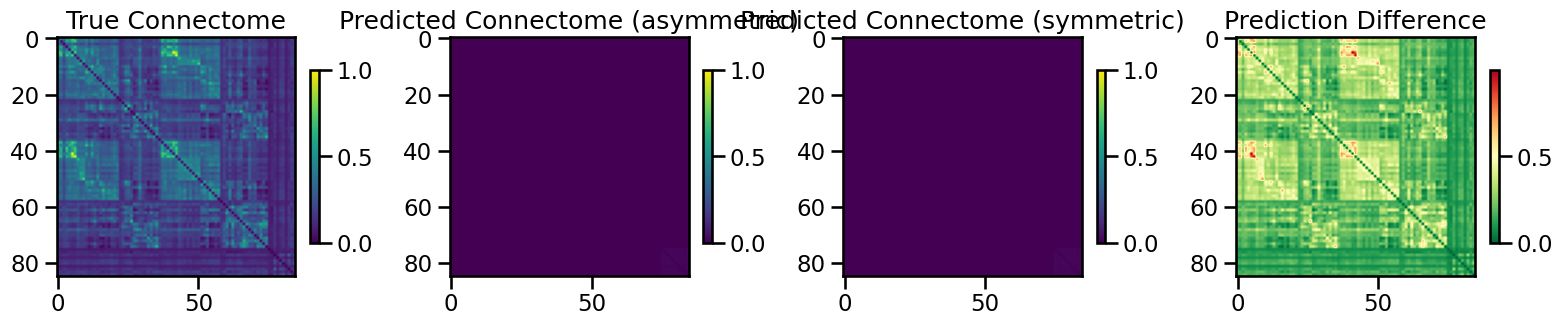

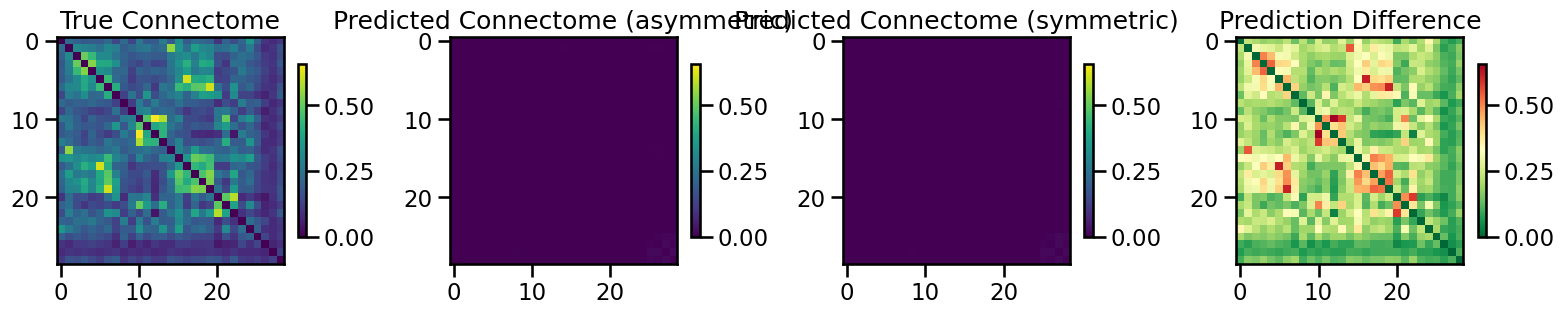


TRAIN METRICS: {'mse': 0.06891546563841959, 'mae': 0.23189188386659645, 'r2': -3.527618391957059, 'pearson_corr': 0.14695217166123029, 'geodesic_distance': 58.18340784982769}
TEST METRICS: {'mse': 0.05960241215894901, 'mae': 0.21677941316565283, 'r2': -3.694274234104051, 'pearson_corr': 0.19615069081959996, 'geodesic_distance': 33.98136903973839}
BEST VAL SCORE 0.0
BEST MODEL PARAMS {'input_dim': 34, 'learning_rate': 0.004875153653916618, 'epochs': 127, 'batch_size': 263, 'regularization': 'l2', 'lambda_reg': 6.573496351059915, 'device': 'cuda'}


  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.
CPU Usage: 22.8%
RAM Usage: 15.3%
Available RAM: 1.3T
Total RAM: 1.5T
| ID | GPU | MEM |
------------------
|  0 |  0% |  4% |


  gc.collect()



54941

In [67]:
# Run simulation
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='bilinear_SCM',
              feature_type=[{'transcriptome': 'PCA'}],
              connectome_target='FC',
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S100',
              gene_list='0.2',
              hemisphere='both',
              search_method=('wandb', 'mse', 10),
              save_sim=False,
              track_wandb=True,
              skip_cv=False
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
import gc
gc.collect()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Number of components for 95% variance PCA: 18
X shape: (100, 105)
X_pca shape: (100, 18)
Y_sc shape: (100, 100)
Y_sc_spectralL shape: (100, 99)
Y_sc_spectralA shape: (100, 100)
Y_fc shape: (100, 100)
Coordinates shape: (100, 3)
Y shape (100, 100)
feature_name:  transcriptome
processing_type:  None
[array([[0.56059648, 0.41960622, 0.57103195, ..., 0.46785316, 0.59037422,
        0.56464022],
       [0.51425843, 0.65230772, 0.33230043, ..., 0.77816765, 0.26183527,
        0.23664739],
       [0.53210758, 0.6758901 , 0.34246349, ..., 0.77639261, 0.37072227,
        0.25455669],
       ...,
       [0.54437372, 0.70531235, 0.46026156, ..., 0.72354466, 0.36381958,
        0.40759554],
       [0.53647949, 0.50716762, 0.49156917, ..., 0.60044099, 0.28591554,
        0.34474124],
       [0.57042668, 0.57097989, 0.45191968, ..., 0.68267324, 0.300151  ,
        0.31234667]])]
X shape (100, 105)

 Test fold num: 1 X_train shape: (5550, 210) Y_train shape: (5550,) X_test shape: (600, 210) Y_test sh

wandb: Agent Starting Run: on1rbo46 with config:
wandb: 	activation: none
wandb: 	batch_size: 128
wandb: 	epochs: 150
wandb: 	input_dim: 210
wandb: 	lambda_reg: 0.01
wandb: 	learning_rate: 0.003
wandb: 	reduced_dim: 11
wandb: 	regularization: l2
wandb: 	shared_weights: True
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0
Number of learnable parameters in bilinear low rank model: 1155
Epoch 10/150, Train Loss: 0.0281, Val Loss: 0.0328
Epoch 20/150, Train Loss: 0.0296, Val Loss: 0.0343
Epoch 30/150, Train Loss: 0.0274, Val Loss: 0.0339
Epoch 40/150, Train Loss: 0.0262, Val Loss: 0.0345
Epoch 50/150, Train Loss: 0.0256, Val Loss: 0.0344
Epoch 60/150, Train Loss: 0.0251, Val Loss: 0.0341
Epoch 70/150, Train Loss: 0.0248, Val Loss: 0.0344
Epoch 80/150, Train Loss: 0.0245, Val Loss: 0.0350
Epoch 90/150, Train Loss: 0.0242, Val Loss: 0.0353
Epoch 100/150, Train Loss: 0.0239, Val Loss: 0.0350
Epoch 110/150, Train Loss: 0.0237, Val Loss: 0.0347
Epoch 120/150, Train Loss: 0.0234, Val Loss: 0.0346
Epoch 130/150, Train Loss: 0.0232, Val Loss: 0.0344
Epoch 140/150, Train Loss: 0.0230, Val Loss: 0.0341
Epoch 150/150, Train Loss: 0.0228, Val Loss: 0.0339
Processing inner fold 1
Number of learnable parameters in bilinear low rank model: 1155
Epoch 10/150, Train Loss: 0.0318, Val Loss: 0.0407
Ep

wandb: Sorting runs by +summary_metrics.mean_val_loss


Number of learnable parameters in bilinear low rank model: 1155
Epoch 10/150, Train Loss: 0.0440, Val Loss: 0.0437
Epoch 20/150, Train Loss: 0.0414, Val Loss: 0.0355
Epoch 30/150, Train Loss: 0.0327, Val Loss: 0.0241
Epoch 40/150, Train Loss: 0.0304, Val Loss: 0.0257
Epoch 50/150, Train Loss: 0.0289, Val Loss: 0.0270
Epoch 60/150, Train Loss: 0.0281, Val Loss: 0.0277
Epoch 70/150, Train Loss: 0.0275, Val Loss: 0.0274
Epoch 80/150, Train Loss: 0.0270, Val Loss: 0.0277
Epoch 90/150, Train Loss: 0.0266, Val Loss: 0.0274
Epoch 100/150, Train Loss: 0.0262, Val Loss: 0.0271
Epoch 110/150, Train Loss: 0.0258, Val Loss: 0.0268
Epoch 120/150, Train Loss: 0.0254, Val Loss: 0.0264
Epoch 130/150, Train Loss: 0.0250, Val Loss: 0.0260
Epoch 140/150, Train Loss: 0.0247, Val Loss: 0.0256
Epoch 150/150, Train Loss: 0.0244, Val Loss: 0.0252


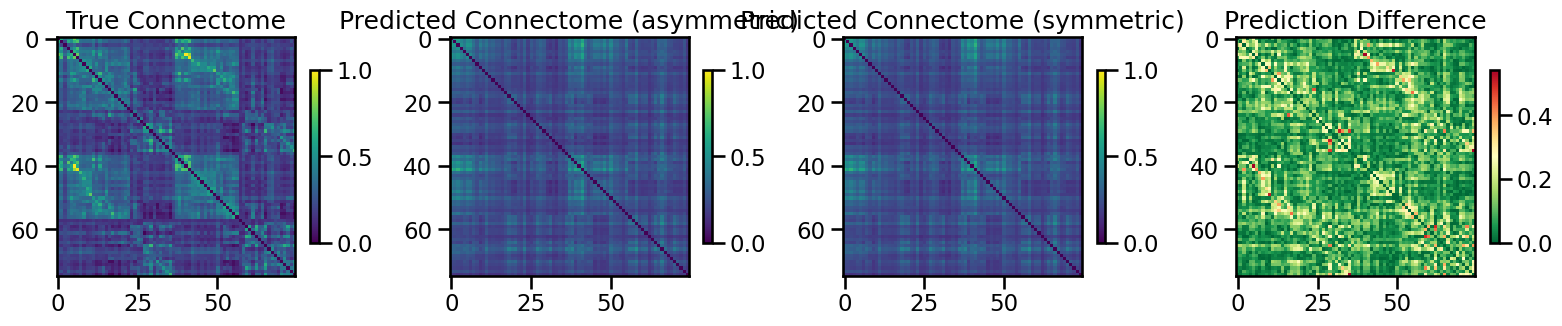

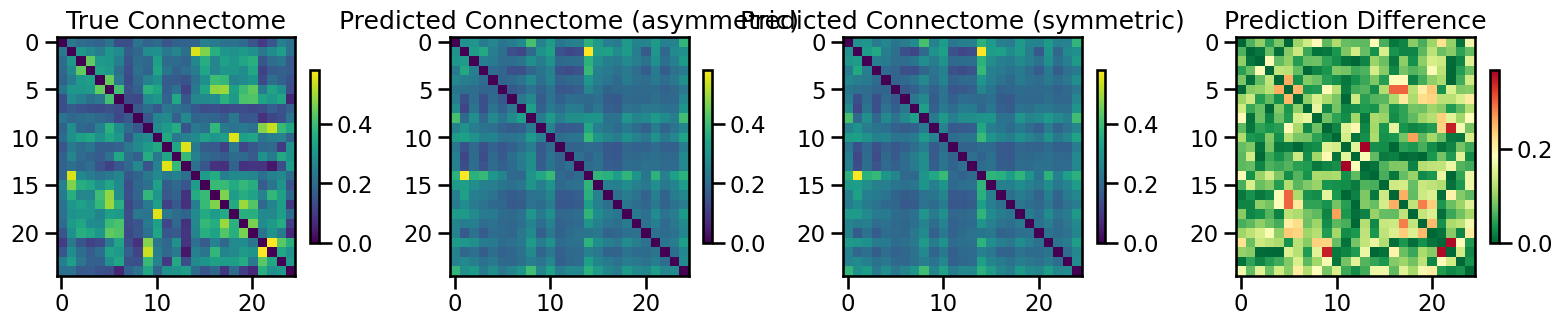

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.



TRAIN METRICS: {'mse': 0.013845251219275637, 'mae': 0.08968554093282968, 'r2': 0.08379096097826266, 'pearson_corr': 0.36811863435967707, 'geodesic_distance': 8.970593242159463}
TEST METRICS: {'mse': 0.012926993228026287, 'mae': 0.09021853660955007, 'r2': -0.31470418120872323, 'pearson_corr': 0.04535251725011229, 'geodesic_distance': 4.7268879841755185}
BEST VAL SCORE 0.03290004345277945
BEST MODEL PARAMS {'input_dim': 105, 'reduced_dim': 11, 'activation': 'identity', 'learning_rate': 0.003, 'epochs': 150, 'batch_size': 128, 'regularization': 'l2', 'lambda_reg': 0.01, 'shared_weights': True, 'device': 'cuda'}


  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.
CPU Usage: 38.8%
RAM Usage: 15.6%
Available RAM: 850.0G
Total RAM: 1007.0G
| ID | GPU | MEM |
------------------
|  0 |  0% |  3% |

 Test fold num: 2 X_train shape: (5550, 210) Y_train shape: (5550,) X_test shape: (600, 210) Y_test shape: (600,)
SEARCH METHOD ('wandb', 'mse', 1)
1
3
4
Create sweep with ID: wvzqu7m7
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/wvzqu7m7


wandb: Agent Starting Run: 7jwdfnxp with config:
wandb: 	activation: none
wandb: 	batch_size: 128
wandb: 	epochs: 150
wandb: 	input_dim: 210
wandb: 	lambda_reg: 0.1
wandb: 	learning_rate: 0.01
wandb: 	reduced_dim: 3
wandb: 	regularization: l1
wandb: 	shared_weights: True
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



  warnings.warn(*args, **kwargs)  # noqa: B028



Processing inner fold 0
Number of learnable parameters in bilinear low rank model: 315
Epoch 10/150, Train Loss: 0.4805, Val Loss: 0.4455
Epoch 20/150, Train Loss: 0.2548, Val Loss: 0.2428
Epoch 30/150, Train Loss: 0.1765, Val Loss: 0.1713
Epoch 40/150, Train Loss: 0.1361, Val Loss: 0.1368
Epoch 50/150, Train Loss: 0.1183, Val Loss: 0.1178
Epoch 60/150, Train Loss: 0.1071, Val Loss: 0.1118
Epoch 70/150, Train Loss: 0.1066, Val Loss: 0.1086
Epoch 80/150, Train Loss: 0.1017, Val Loss: 0.1053
Epoch 90/150, Train Loss: 0.1036, Val Loss: 0.1056
Epoch 100/150, Train Loss: 0.1022, Val Loss: 0.1051
Epoch 110/150, Train Loss: 0.1044, Val Loss: 0.1072
Epoch 120/150, Train Loss: 0.1000, Val Loss: 0.1033
Epoch 130/150, Train Loss: 0.1026, Val Loss: 0.1043
Epoch 140/150, Train Loss: 0.0995, Val Loss: 0.1013
Epoch 150/150, Train Loss: 0.1019, Val Loss: 0.1030
Processing inner fold 1
Number of learnable parameters in bilinear low rank model: 315
Epoch 10/150, Train Loss: 0.3036, Val Loss: 0.3442
Epoc

wandb: Sorting runs by +summary_metrics.mean_val_loss


Number of learnable parameters in bilinear low rank model: 315
Epoch 10/150, Train Loss: 0.2625, Val Loss: 0.3100
Epoch 20/150, Train Loss: 0.1828, Val Loss: 0.2176
Epoch 30/150, Train Loss: 0.1272, Val Loss: 0.1692
Epoch 40/150, Train Loss: 0.1071, Val Loss: 0.1599
Epoch 50/150, Train Loss: 0.0865, Val Loss: 0.1487
Epoch 60/150, Train Loss: 0.0826, Val Loss: 0.1418
Epoch 70/150, Train Loss: 0.0814, Val Loss: 0.1408
Epoch 80/150, Train Loss: 0.0781, Val Loss: 0.1406
Epoch 90/150, Train Loss: 0.0790, Val Loss: 0.1394
Epoch 100/150, Train Loss: 0.0760, Val Loss: 0.1391
Epoch 110/150, Train Loss: 0.0798, Val Loss: 0.1406
Epoch 120/150, Train Loss: 0.0776, Val Loss: 0.1421
Epoch 130/150, Train Loss: 0.0801, Val Loss: 0.1404
Epoch 140/150, Train Loss: 0.0787, Val Loss: 0.1417
Epoch 150/150, Train Loss: 0.0806, Val Loss: 0.1432


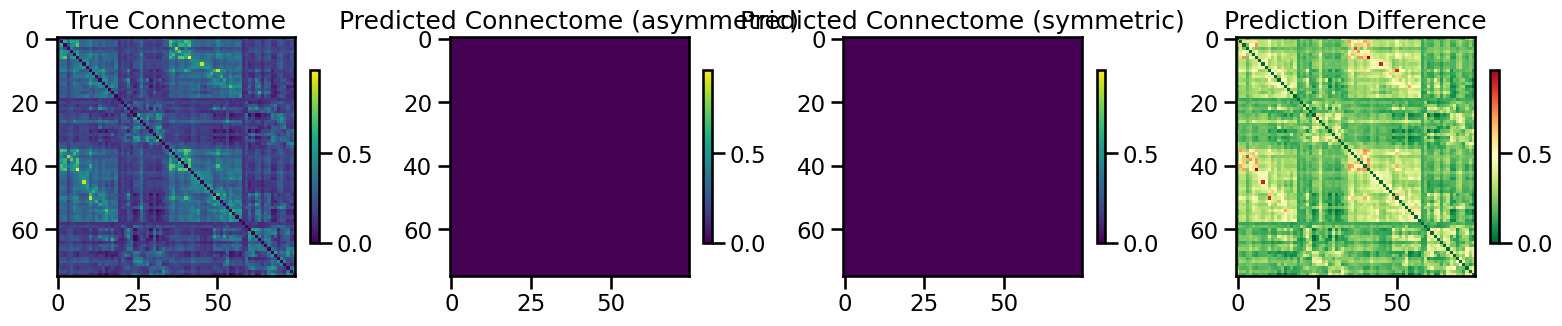

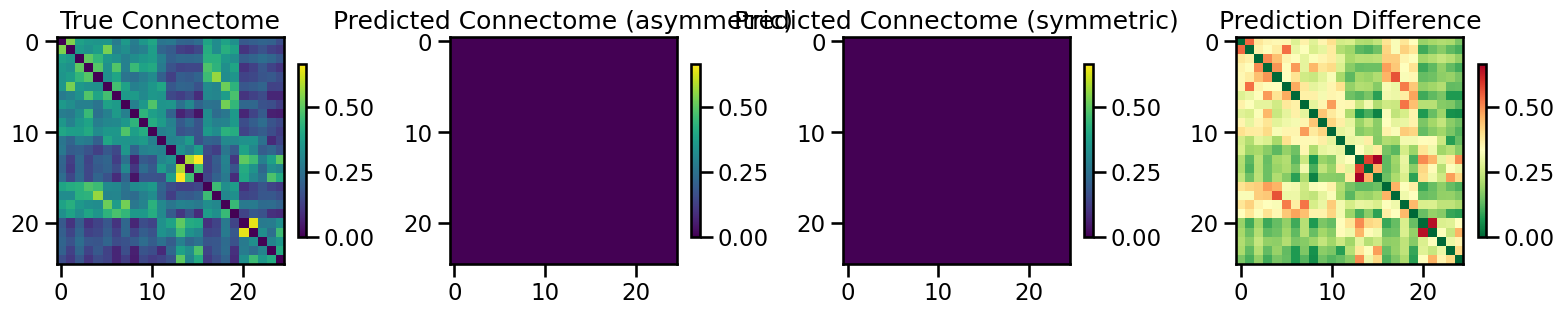

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.



TRAIN METRICS: {'mse': 0.07777816754317234, 'mae': 0.2537444527564721, 'r2': -4.808425300494115, 'pearson_corr': -0.17771252541380014, 'geodesic_distance': 76.03269999952751}
TEST METRICS: {'mse': 0.0877574705891446, 'mae': 0.2714689018765027, 'r2': -5.241170355124854, 'pearson_corr': -0.1270022396119801, 'geodesic_distance': 41.85802485923501}
BEST VAL SCORE 0.12432750562826791
BEST MODEL PARAMS {'input_dim': 105, 'reduced_dim': 3, 'activation': 'identity', 'learning_rate': 0.01, 'epochs': 150, 'batch_size': 128, 'regularization': 'l1', 'lambda_reg': 0.1, 'shared_weights': True, 'device': 'cuda'}


  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.
CPU Usage: 38.8%
RAM Usage: 15.3%
Available RAM: 852.8G
Total RAM: 1007.0G
| ID | GPU | MEM |
------------------
|  0 |  0% |  3% |

 Test fold num: 3 X_train shape: (5550, 210) Y_train shape: (5550,) X_test shape: (600, 210) Y_test shape: (600,)
SEARCH METHOD ('wandb', 'mse', 1)
1
2
4
Create sweep with ID: 7uk6ddas
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/7uk6ddas


wandb: Agent Starting Run: 1jru1fqx with config:
wandb: 	activation: none
wandb: 	batch_size: 256
wandb: 	epochs: 100
wandb: 	input_dim: 210
wandb: 	lambda_reg: 0.1
wandb: 	learning_rate: 0.001
wandb: 	reduced_dim: 12
wandb: 	regularization: l1
wandb: 	shared_weights: True
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0
Number of learnable parameters in bilinear low rank model: 1260
Epoch 10/100, Train Loss: 5.5710, Val Loss: 5.4520
Epoch 20/100, Train Loss: 4.5804, Val Loss: 4.4782
Epoch 30/100, Train Loss: 3.6723, Val Loss: 3.5773
Epoch 40/100, Train Loss: 2.8553, Val Loss: 2.7700
Epoch 50/100, Train Loss: 2.1345, Val Loss: 2.0566


  warnings.warn(*args, **kwargs)  # noqa: B028



Epoch 60/100, Train Loss: 1.5280, Val Loss: 1.4591
Epoch 70/100, Train Loss: 1.0245, Val Loss: 0.9684
Epoch 80/100, Train Loss: 0.6386, Val Loss: 0.5930
Epoch 90/100, Train Loss: 0.3803, Val Loss: 0.3456
Epoch 100/100, Train Loss: 0.2602, Val Loss: 0.2334
Processing inner fold 1
Number of learnable parameters in bilinear low rank model: 1260
Epoch 10/100, Train Loss: 5.7409, Val Loss: 5.6840
Epoch 20/100, Train Loss: 4.9488, Val Loss: 4.8803
Epoch 30/100, Train Loss: 4.1388, Val Loss: 4.0685
Epoch 40/100, Train Loss: 3.3838, Val Loss: 3.3182
Epoch 50/100, Train Loss: 2.6867, Val Loss: 2.6291
Epoch 60/100, Train Loss: 2.0572, Val Loss: 2.0054
Epoch 70/100, Train Loss: 1.5133, Val Loss: 1.4699
Epoch 80/100, Train Loss: 1.0632, Val Loss: 1.0306
Epoch 90/100, Train Loss: 0.7076, Val Loss: 0.6863
Epoch 100/100, Train Loss: 0.4652, Val Loss: 0.4568
Processing inner fold 2
Number of learnable parameters in bilinear low rank model: 1260
Epoch 10/100, Train Loss: 5.5807, Val Loss: 5.5103
Epoch 

  return tuple(tensor[index] for tensor in self.tensors)

  return tuple(tensor[index] for tensor in self.tensors)

  return tuple(tensor[index] for tensor in self.tensors)

  return tuple(tensor[index] for tensor in self.tensors)

  return tuple(tensor[index] for tensor in self.tensors)

  return tuple(tensor[index] for tensor in self.tensors)

  return tuple(tensor[index] for tensor in self.tensors)

  return tuple(tensor[index] for tensor in self.tensors)

  return tuple(tensor[index] for tensor in self.tensors)

  return tuple(tensor[index] for tensor in self.tensors)



Epoch 60/100, Train Loss: 1.7698, Val Loss: 1.7245
Epoch 70/100, Train Loss: 1.2684, Val Loss: 1.2339
Epoch 80/100, Train Loss: 0.8628, Val Loss: 0.8410
Epoch 90/100, Train Loss: 0.5680, Val Loss: 0.5558
Epoch 100/100, Train Loss: 0.3809, Val Loss: 0.3793


wandb: Sorting runs by +summary_metrics.mean_val_loss


Number of learnable parameters in bilinear low rank model: 1260
Epoch 10/100, Train Loss: 5.3503, Val Loss: 5.2511
Epoch 20/100, Train Loss: 4.4088, Val Loss: 4.3191
Epoch 30/100, Train Loss: 3.5305, Val Loss: 3.4510
Epoch 40/100, Train Loss: 2.7391, Val Loss: 2.6678
Epoch 50/100, Train Loss: 2.0522, Val Loss: 1.9891
Epoch 60/100, Train Loss: 1.4707, Val Loss: 1.4162
Epoch 70/100, Train Loss: 0.9973, Val Loss: 0.9503
Epoch 80/100, Train Loss: 0.6160, Val Loss: 0.5799
Epoch 90/100, Train Loss: 0.3755, Val Loss: 0.3524
Epoch 100/100, Train Loss: 0.2408, Val Loss: 0.2247


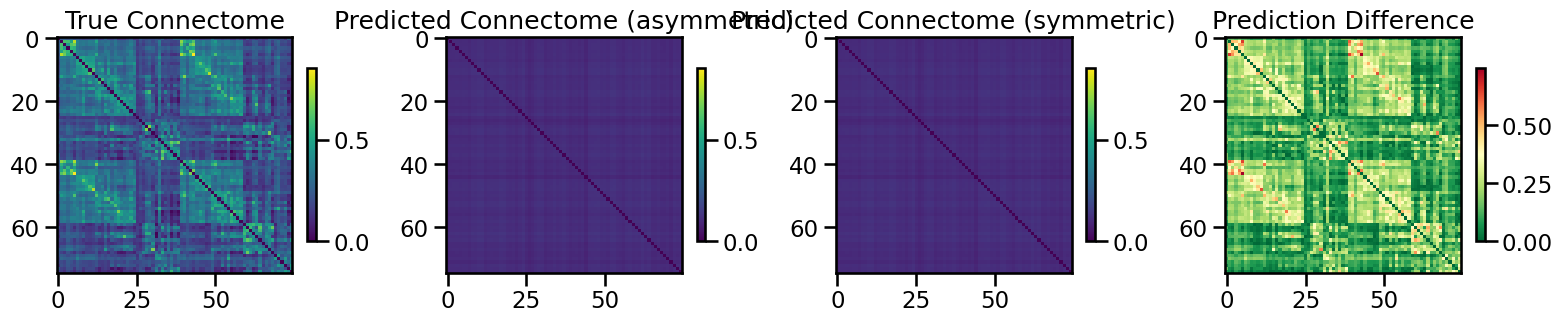

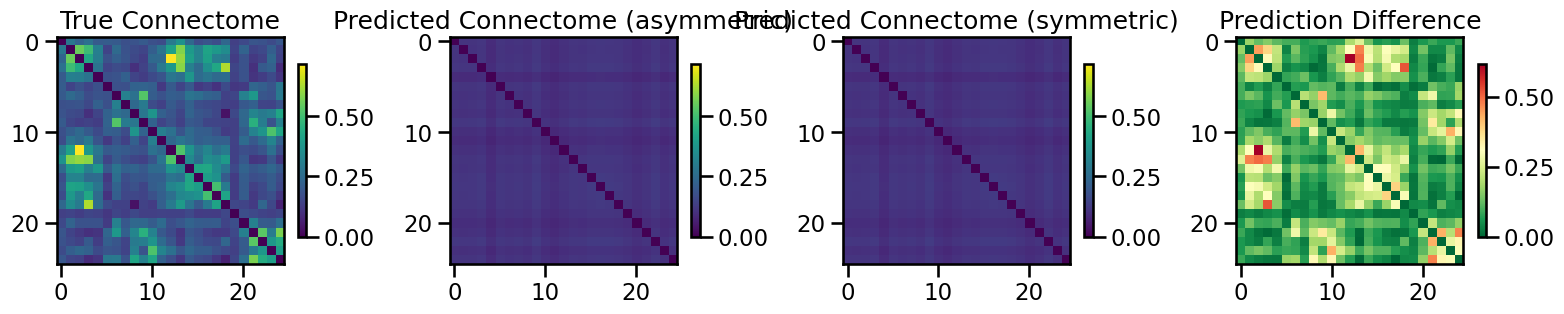

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.



TRAIN METRICS: {'mse': 0.03948948322860095, 'mae': 0.16391091184539666, 'r2': -1.869522106255586, 'pearson_corr': 0.14855687789065306, 'geodesic_distance': 14.641774233358266}
TEST METRICS: {'mse': 0.028910758194894016, 'mae': 0.13248097611568702, 'r2': -1.4702436272611838, 'pearson_corr': 0.07535813118931636, 'geodesic_distance': 6.900677696091444}
BEST VAL SCORE 0.3564769774675369
BEST MODEL PARAMS {'input_dim': 105, 'reduced_dim': 12, 'activation': 'identity', 'learning_rate': 0.001, 'epochs': 100, 'batch_size': 256, 'regularization': 'l1', 'lambda_reg': 0.1, 'shared_weights': True, 'device': 'cuda'}


  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.
CPU Usage: 38.2%
RAM Usage: 15.3%
Available RAM: 852.9G
Total RAM: 1007.0G
| ID | GPU | MEM |
------------------
|  0 |  0% |  3% |

 Test fold num: 4 X_train shape: (5550, 210) Y_train shape: (5550,) X_test shape: (600, 210) Y_test shape: (600,)
SEARCH METHOD ('wandb', 'mse', 1)
1
2
3
Create sweep with ID: q2embxhw
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/q2embxhw


wandb: Agent Starting Run: 6opgw8et with config:
wandb: 	activation: none
wandb: 	batch_size: 256
wandb: 	epochs: 150
wandb: 	input_dim: 210
wandb: 	lambda_reg: 1
wandb: 	learning_rate: 0.001
wandb: 	reduced_dim: 10
wandb: 	regularization: l1
wandb: 	shared_weights: True
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0
Number of learnable parameters in bilinear low rank model: 1050
Epoch 10/150, Train Loss: 42.2997, Val Loss: 41.3651
Epoch 20/150, Train Loss: 33.4290, Val Loss: 32.5915


  warnings.warn(*args, **kwargs)  # noqa: B028



Epoch 30/150, Train Loss: 25.6083, Val Loss: 24.8638
Epoch 40/150, Train Loss: 18.8766, Val Loss: 18.2392
Epoch 50/150, Train Loss: 13.2982, Val Loss: 12.7797
Epoch 60/150, Train Loss: 8.6359, Val Loss: 8.1828
Epoch 70/150, Train Loss: 5.0346, Val Loss: 4.6940
Epoch 80/150, Train Loss: 2.5351, Val Loss: 2.3061
Epoch 90/150, Train Loss: 1.0732, Val Loss: 0.9544
Epoch 100/150, Train Loss: 0.6538, Val Loss: 0.6035
Epoch 110/150, Train Loss: 0.4210, Val Loss: 0.3649
Epoch 120/150, Train Loss: 0.3221, Val Loss: 0.2789
Epoch 130/150, Train Loss: 0.2730, Val Loss: 0.2323
Epoch 140/150, Train Loss: 0.2613, Val Loss: 0.2183
Epoch 150/150, Train Loss: 0.2425, Val Loss: 0.2046
Processing inner fold 1
Number of learnable parameters in bilinear low rank model: 1050
Epoch 10/150, Train Loss: 44.0126, Val Loss: 43.1402
Epoch 20/150, Train Loss: 35.0847, Val Loss: 34.2565
Epoch 30/150, Train Loss: 27.1152, Val Loss: 26.3900
Epoch 40/150, Train Loss: 20.2587, Val Loss: 19.6476
Epoch 50/150, Train Loss:

wandb: Sorting runs by +summary_metrics.mean_val_loss


Number of learnable parameters in bilinear low rank model: 1050
Epoch 10/150, Train Loss: 42.7327, Val Loss: 41.7794
Epoch 20/150, Train Loss: 33.7594, Val Loss: 32.9350
Epoch 30/150, Train Loss: 25.9434, Val Loss: 25.2121
Epoch 40/150, Train Loss: 19.0609, Val Loss: 18.4358
Epoch 50/150, Train Loss: 13.3308, Val Loss: 12.8314
Epoch 60/150, Train Loss: 8.6597, Val Loss: 8.2999
Epoch 70/150, Train Loss: 5.2002, Val Loss: 4.9305
Epoch 80/150, Train Loss: 2.7286, Val Loss: 2.5825
Epoch 90/150, Train Loss: 1.2258, Val Loss: 1.1901
Epoch 100/150, Train Loss: 0.6278, Val Loss: 0.6323
Epoch 110/150, Train Loss: 0.4052, Val Loss: 0.4428
Epoch 120/150, Train Loss: 0.2762, Val Loss: 0.3257
Epoch 130/150, Train Loss: 0.2163, Val Loss: 0.2655
Epoch 140/150, Train Loss: 0.1930, Val Loss: 0.2425
Epoch 150/150, Train Loss: 0.1804, Val Loss: 0.2368


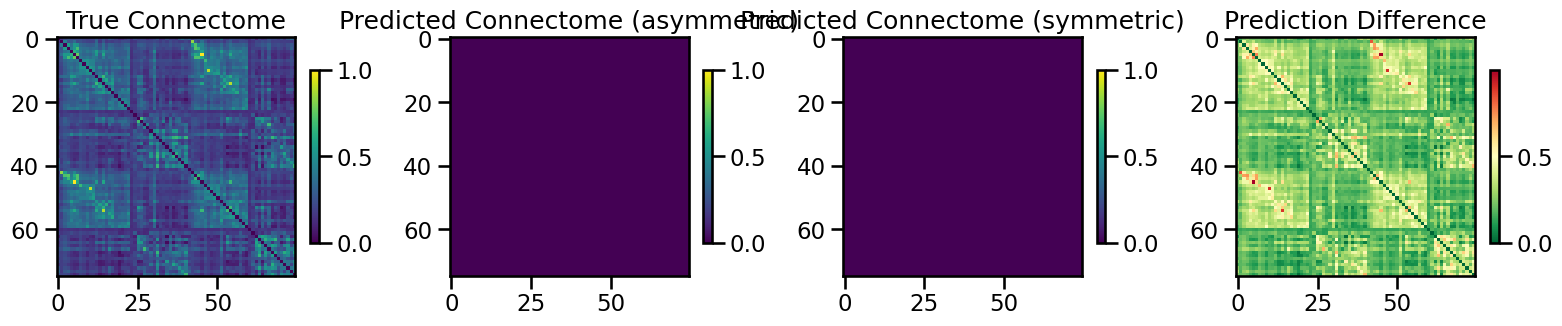

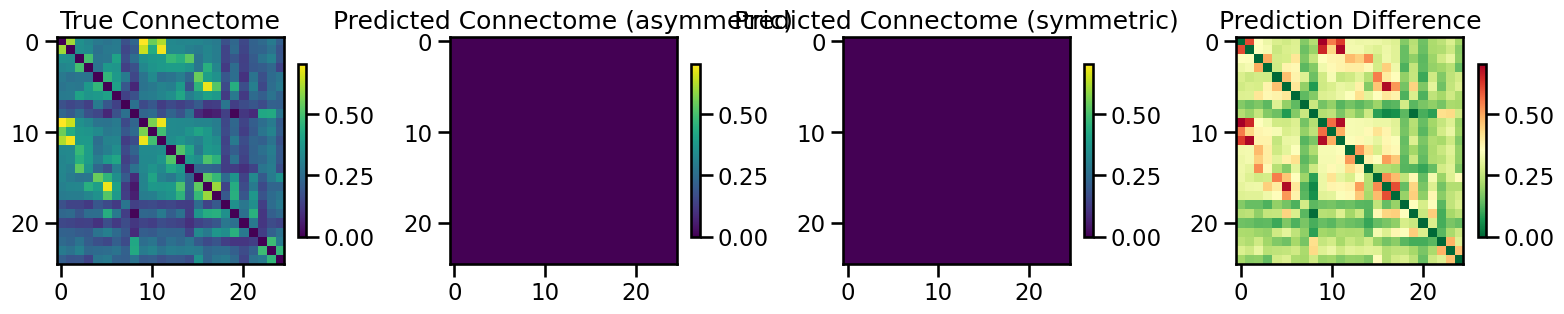

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.



TRAIN METRICS: {'mse': 0.0797512141567215, 'mae': 0.25693962312259644, 'r2': -4.807156444944388, 'pearson_corr': 0.12353837073716588, 'geodesic_distance': 95.52598027075233}
TEST METRICS: {'mse': 0.09212152155328278, 'mae': 0.2783136082349039, 'r2': -5.282539142521173, 'pearson_corr': 0.27507637674798335, 'geodesic_distance': 54.74310420372643}
BEST VAL SCORE 0.21257488429546356
BEST MODEL PARAMS {'input_dim': 105, 'reduced_dim': 10, 'activation': 'identity', 'learning_rate': 0.001, 'epochs': 150, 'batch_size': 256, 'regularization': 'l1', 'lambda_reg': 1, 'shared_weights': True, 'device': 'cuda'}


  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.
CPU Usage: 38.2%
RAM Usage: 15.3%
Available RAM: 853.1G
Total RAM: 1007.0G
| ID | GPU | MEM |
------------------
|  0 |  0% |  3% |


  gc.collect()

  gc.collect()

  gc.collect()



79806

In [37]:
# Run simulation
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='bilinear_lowrank',
              feature_type=[{'transcriptome': None}],
              connectome_target='FC',
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=True,
              parcellation='S100',
              gene_list='richiardi2015',
              hemisphere='both', 
              search_method=('wandb', 'mse', 1),
              save_sim=False,
              track_wandb=True
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
import gc
gc.collect()

In [ ]:

single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='bilinear_SCM',
              feature_type=[{'transcriptome': 'PCA'}],
              connectome_target='FC',
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S100',
              gene_list='0.2',
              search_method=('wandb', 'mse', 10),
              save_sim=False,
              track_wandb=True
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
import gc
gc.collect()

In [ ]:

single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='dynamic_mlp',
              feature_type=[{'transcriptome': None}],
              connectome_target='FC',
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S100',
              gene_list='0.2',
              search_method=('wandb', 'mse', 10),
              save_sim=False,
              track_wandb=True
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
import gc
gc.collect()

In [ ]:
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='dynamic_mlp',
              feature_type=[{'transcriptome': None}],
              connectome_target='FC',
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              gene_list='0.2',
              search_method=('wandb', 'mse', 1),
              save_sim=False,
              track_wandb=True
              )

Number of components for PCA: 34
X shape: (114, 11053)
X_pca shape: (114, 34)
Y_sc shape: (114, 114)
Y_sc_spectralL shape: (114, 113)
Y_sc_spectralA shape: (114, 114)
Y_fc shape: (114, 114)
Coordinates shape: (114, 3)
Y shape (114, 114)
feature_name:  transcriptome
processing_type:  None
X shape (114, 11053)

 Test fold num: 1 X_train shape: (7140, 22106) Y_train shape: (7140,) X_test shape: (812, 22106) Y_test shape: (812,)
SEARCH METHOD ('wandb', 'mse', 5)
2
3
4
Create sweep with ID: r5lj4dt3
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/r5lj4dt3


wandb: Agent Starting Run: d8az58re with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0
wandb: 	epochs: 100
wandb: 	hidden_dims: [256, 128]
wandb: 	input_dim: 22106
wandb: 	learning_rate: 0.0003
wandb: 	symmetry_weight: 0
wandb: 	weight_decay: 0
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0
Epoch 10/100, Train Loss: 0.0186, Val Loss: 0.0540
Epoch 20/100, Train Loss: 0.0145, Val Loss: 0.0306
Epoch 30/100, Train Loss: 0.0210, Val Loss: 0.1400
Epoch 40/100, Train Loss: 0.0114, Val Loss: 0.0476
Epoch 50/100, Train Loss: 0.0148, Val Loss: 0.0625
Epoch 60/100, Train Loss: 0.0080, Val Loss: 0.0381
Epoch 70/100, Train Loss: 0.0075, Val Loss: 0.0328
Epoch 80/100, Train Loss: 0.0092, Val Loss: 0.0513
Epoch 90/100, Train Loss: 0.0057, Val Loss: 0.0460
Epoch 100/100, Train Loss: 0.0056, Val Loss: 0.0434
Processing inner fold 1


  warnings.warn(*args, **kwargs)  # noqa: B028



Epoch 10/100, Train Loss: 0.0212, Val Loss: 0.0748
Epoch 20/100, Train Loss: 0.0163, Val Loss: 0.0742
Epoch 30/100, Train Loss: 0.0123, Val Loss: 0.0442
Epoch 40/100, Train Loss: 0.0145, Val Loss: 0.0511
Epoch 50/100, Train Loss: 0.0175, Val Loss: 0.0579
Epoch 60/100, Train Loss: 0.0102, Val Loss: 0.0587
Epoch 70/100, Train Loss: 0.0106, Val Loss: 0.0583
Epoch 80/100, Train Loss: 0.0110, Val Loss: 0.0449
Epoch 90/100, Train Loss: 0.0126, Val Loss: 0.0463
Epoch 100/100, Train Loss: 0.0094, Val Loss: 0.0404
Processing inner fold 2
Epoch 10/100, Train Loss: 0.0228, Val Loss: 0.0608


  transposed = list(zip(*batch))  # It may be accessed twice, so we use a list.

  transposed = list(zip(*batch))  # It may be accessed twice, so we use a list.



Epoch 20/100, Train Loss: 0.0173, Val Loss: 0.0533
Epoch 30/100, Train Loss: 0.0155, Val Loss: 0.0449
Epoch 40/100, Train Loss: 0.0107, Val Loss: 0.0418
Epoch 50/100, Train Loss: 0.0188, Val Loss: 0.0495
Epoch 60/100, Train Loss: 0.0117, Val Loss: 0.0447
Epoch 70/100, Train Loss: 0.0091, Val Loss: 0.0351
Epoch 80/100, Train Loss: 0.0087, Val Loss: 0.0365
Epoch 90/100, Train Loss: 0.0086, Val Loss: 0.0468
Epoch 100/100, Train Loss: 0.0090, Val Loss: 0.0349


wandb: Agent Starting Run: xo9afn5k with config:
wandb: 	batch_size: 256
wandb: 	dropout_rate: 0
wandb: 	epochs: 100
wandb: 	hidden_dims: [512, 256, 128]
wandb: 	input_dim: 22106
wandb: 	learning_rate: 0.0003
wandb: 	symmetry_weight: 0
wandb: 	weight_decay: 0
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0
Epoch 10/100, Train Loss: 0.0193, Val Loss: 0.0379
Epoch 20/100, Train Loss: 0.0190, Val Loss: 0.0726
Epoch 30/100, Train Loss: 0.0142, Val Loss: 0.0363
Epoch 40/100, Train Loss: 0.0102, Val Loss: 0.0369
Epoch 50/100, Train Loss: 0.0116, Val Loss: 0.0415
Epoch 60/100, Train Loss: 0.0093, Val Loss: 0.0466
Epoch 70/100, Train Loss: 0.0096, Val Loss: 0.0581
Epoch 80/100, Train Loss: 0.0062, Val Loss: 0.0355
Epoch 90/100, Train Loss: 0.0086, Val Loss: 0.0394
Epoch 100/100, Train Loss: 0.0061, Val Loss: 0.0390
Processing inner fold 1
Epoch 10/100, Train Loss: 0.0167, Val Loss: 0.0524
Epoch 20/100, Train Loss: 0.0194, Val Loss: 0.0489
Epoch 30/100, Train Loss: 0.0137, Val Loss: 0.0405
Epoch 40/100, Train Loss: 0.0091, Val Loss: 0.0421
Epoch 50/100, Train Loss: 0.0090, Val Loss: 0.0485
Epoch 60/100, Train Loss: 0.0139, Val Loss: 0.0337
Epoch 70/100, Train Loss: 0.0064, Val Loss: 0.0442
Epoch 80/100, Train Loss: 0.0078, Val Loss: 0.0512
Epoch 90/100, Train Loss: 0.0062,

  return tuple(tensor[index] for tensor in self.tensors)



Epoch 90/100, Train Loss: 0.0052, Val Loss: 0.0255
Epoch 100/100, Train Loss: 0.0063, Val Loss: 0.0332


wandb: Agent Starting Run: anc78d1l with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.1
wandb: 	epochs: 200
wandb: 	hidden_dims: [512, 256, 128]
wandb: 	input_dim: 22106
wandb: 	learning_rate: 0.0003
wandb: 	symmetry_weight: 0
wandb: 	weight_decay: 0
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0
Epoch 10/200, Train Loss: 0.0537, Val Loss: 0.0274
Epoch 20/200, Train Loss: 0.0392, Val Loss: 0.0299
Epoch 30/200, Train Loss: 0.0291, Val Loss: 0.0249
Epoch 40/200, Train Loss: 0.0214, Val Loss: 0.0271
Epoch 50/200, Train Loss: 0.0165, Val Loss: 0.0263
Epoch 60/200, Train Loss: 0.0129, Val Loss: 0.0260
Epoch 70/200, Train Loss: 0.0107, Val Loss: 0.0290
Epoch 80/200, Train Loss: 0.0090, Val Loss: 0.0286
Epoch 90/200, Train Loss: 0.0080, Val Loss: 0.0298
Epoch 100/200, Train Loss: 0.0072, Val Loss: 0.0349
Epoch 110/200, Train Loss: 0.0065, Val Loss: 0.0372
Epoch 120/200, Train Loss: 0.0060, Val Loss: 0.0362
Epoch 130/200, Train Loss: 0.0058, Val Loss: 0.0466
Epoch 140/200, Train Loss: 0.0055, Val Loss: 0.0392
Epoch 150/200, Train Loss: 0.0057, Val Loss: 0.0403
Epoch 160/200, Train Loss: 0.0050, Val Loss: 0.0348
Epoch 170/200, Train Loss: 0.0051, Val Loss: 0.0402
Epoch 180/200, Train Loss: 0.0048, Val Loss: 0.0419
Epoch 190/200, Train Loss: 0.0048, Val Loss: 0.04

  warnings.warn(*args, **kwargs)  # noqa: B028



Epoch 10/200, Train Loss: 0.0494, Val Loss: 0.0330
Epoch 20/200, Train Loss: 0.0349, Val Loss: 0.0295
Epoch 30/200, Train Loss: 0.0244, Val Loss: 0.0307
Epoch 40/200, Train Loss: 0.0201, Val Loss: 0.0336
Epoch 50/200, Train Loss: 0.0160, Val Loss: 0.0313
Epoch 60/200, Train Loss: 0.0140, Val Loss: 0.0320
Epoch 70/200, Train Loss: 0.0123, Val Loss: 0.0361
Epoch 80/200, Train Loss: 0.0109, Val Loss: 0.0392
Epoch 90/200, Train Loss: 0.0099, Val Loss: 0.0372
Epoch 100/200, Train Loss: 0.0093, Val Loss: 0.0371
Epoch 110/200, Train Loss: 0.0088, Val Loss: 0.0379
Epoch 120/200, Train Loss: 0.0086, Val Loss: 0.0390
Epoch 130/200, Train Loss: 0.0083, Val Loss: 0.0370
Epoch 140/200, Train Loss: 0.0077, Val Loss: 0.0337
Epoch 150/200, Train Loss: 0.0076, Val Loss: 0.0363
Epoch 160/200, Train Loss: 0.0075, Val Loss: 0.0374
Epoch 170/200, Train Loss: 0.0073, Val Loss: 0.0398
Epoch 180/200, Train Loss: 0.0072, Val Loss: 0.0358
Epoch 190/200, Train Loss: 0.0071, Val Loss: 0.0389
Epoch 200/200, Train 

  transposed = list(zip(*batch))  # It may be accessed twice, so we use a list.



Epoch 150/200, Train Loss: 0.0081, Val Loss: 0.0228
Epoch 160/200, Train Loss: 0.0080, Val Loss: 0.0224
Epoch 170/200, Train Loss: 0.0079, Val Loss: 0.0234
Epoch 180/200, Train Loss: 0.0077, Val Loss: 0.0251
Epoch 190/200, Train Loss: 0.0078, Val Loss: 0.0275
Epoch 200/200, Train Loss: 0.0079, Val Loss: 0.0235


wandb: Agent Starting Run: t1kotjon with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0
wandb: 	epochs: 100
wandb: 	hidden_dims: [512, 256, 128]
wandb: 	input_dim: 22106
wandb: 	learning_rate: 0.0001
wandb: 	symmetry_weight: 0
wandb: 	weight_decay: 0
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0
Epoch 10/100, Train Loss: 0.0213, Val Loss: 0.0329
Epoch 20/100, Train Loss: 0.0212, Val Loss: 0.0587
Epoch 30/100, Train Loss: 0.0073, Val Loss: 0.0410
Epoch 40/100, Train Loss: 0.0083, Val Loss: 0.0481
Epoch 50/100, Train Loss: 0.0108, Val Loss: 0.0326
Epoch 60/100, Train Loss: 0.0076, Val Loss: 0.0368
Epoch 70/100, Train Loss: 0.0068, Val Loss: 0.0354
Epoch 80/100, Train Loss: 0.0071, Val Loss: 0.0275
Epoch 90/100, Train Loss: 0.0088, Val Loss: 0.0315
Epoch 100/100, Train Loss: 0.0091, Val Loss: 0.0341
Processing inner fold 1


  warnings.warn(*args, **kwargs)  # noqa: B028



Epoch 10/100, Train Loss: 0.0475, Val Loss: 0.0651
Epoch 20/100, Train Loss: 0.0275, Val Loss: 0.0597
Epoch 30/100, Train Loss: 0.0145, Val Loss: 0.0488
Epoch 40/100, Train Loss: 0.0100, Val Loss: 0.0518
Epoch 50/100, Train Loss: 0.0088, Val Loss: 0.0555
Epoch 60/100, Train Loss: 0.0105, Val Loss: 0.0569
Epoch 70/100, Train Loss: 0.0087, Val Loss: 0.0575
Epoch 80/100, Train Loss: 0.0089, Val Loss: 0.0449
Epoch 90/100, Train Loss: 0.0084, Val Loss: 0.0535
Epoch 100/100, Train Loss: 0.0092, Val Loss: 0.0590
Processing inner fold 2
Epoch 10/100, Train Loss: 0.0652, Val Loss: 0.0905
Epoch 20/100, Train Loss: 0.0277, Val Loss: 0.0757
Epoch 30/100, Train Loss: 0.0216, Val Loss: 0.0456
Epoch 40/100, Train Loss: 0.0075, Val Loss: 0.0426
Epoch 50/100, Train Loss: 0.0096, Val Loss: 0.0566
Epoch 60/100, Train Loss: 0.0102, Val Loss: 0.0477
Epoch 70/100, Train Loss: 0.0113, Val Loss: 0.0326
Epoch 80/100, Train Loss: 0.0109, Val Loss: 0.0444
Epoch 90/100, Train Loss: 0.0088, Val Loss: 0.0329
Epoch 

wandb: Agent Starting Run: imdjbmj3 with config:
wandb: 	batch_size: 256
wandb: 	dropout_rate: 0
wandb: 	epochs: 200
wandb: 	hidden_dims: [512, 256, 128]
wandb: 	input_dim: 22106
wandb: 	learning_rate: 0.0001
wandb: 	symmetry_weight: 0
wandb: 	weight_decay: 0
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0
Epoch 10/200, Train Loss: 0.0372, Val Loss: 0.0462
Epoch 20/200, Train Loss: 0.0187, Val Loss: 0.0619
Epoch 30/200, Train Loss: 0.0192, Val Loss: 0.0451
Epoch 40/200, Train Loss: 0.0092, Val Loss: 0.0448
Epoch 50/200, Train Loss: 0.0062, Val Loss: 0.0450
Epoch 60/200, Train Loss: 0.0091, Val Loss: 0.0378
Epoch 70/200, Train Loss: 0.0069, Val Loss: 0.0425
Epoch 80/200, Train Loss: 0.0058, Val Loss: 0.0342
Epoch 90/200, Train Loss: 0.0076, Val Loss: 0.0434
Epoch 100/200, Train Loss: 0.0066, Val Loss: 0.0309
Epoch 110/200, Train Loss: 0.0081, Val Loss: 0.0433


  return tuple(tensor[index] for tensor in self.tensors)

  return tuple(tensor[index] for tensor in self.tensors)



Epoch 120/200, Train Loss: 0.0047, Val Loss: 0.0439
Epoch 130/200, Train Loss: 0.0048, Val Loss: 0.0421
Epoch 140/200, Train Loss: 0.0055, Val Loss: 0.0365
Epoch 150/200, Train Loss: 0.0037, Val Loss: 0.0396
Epoch 160/200, Train Loss: 0.0039, Val Loss: 0.0334
Epoch 170/200, Train Loss: 0.0041, Val Loss: 0.0367
Epoch 180/200, Train Loss: 0.0045, Val Loss: 0.0343
Epoch 190/200, Train Loss: 0.0051, Val Loss: 0.0400
Epoch 200/200, Train Loss: 0.0055, Val Loss: 0.0366
Processing inner fold 1
Epoch 10/200, Train Loss: 0.0734, Val Loss: 0.1031
Epoch 20/200, Train Loss: 0.0452, Val Loss: 0.0738
Epoch 30/200, Train Loss: 0.0259, Val Loss: 0.0432
Epoch 40/200, Train Loss: 0.0116, Val Loss: 0.0394
Epoch 50/200, Train Loss: 0.0119, Val Loss: 0.0480
Epoch 60/200, Train Loss: 0.0079, Val Loss: 0.0433
Epoch 70/200, Train Loss: 0.0067, Val Loss: 0.0400
Epoch 80/200, Train Loss: 0.0092, Val Loss: 0.0417
Epoch 90/200, Train Loss: 0.0067, Val Loss: 0.0412
Epoch 100/200, Train Loss: 0.0065, Val Loss: 0.04

wandb: Sorting runs by +summary_metrics.mean_val_loss


Epoch 10/200, Train Loss: 0.0375, Val Loss: 0.0294
Epoch 20/200, Train Loss: 0.0207, Val Loss: 0.0266
Epoch 30/200, Train Loss: 0.0138, Val Loss: 0.0313
Epoch 40/200, Train Loss: 0.0108, Val Loss: 0.0314
Epoch 50/200, Train Loss: 0.0089, Val Loss: 0.0340
Epoch 60/200, Train Loss: 0.0079, Val Loss: 0.0329
Epoch 70/200, Train Loss: 0.0071, Val Loss: 0.0386
Epoch 80/200, Train Loss: 0.0069, Val Loss: 0.0410
Epoch 90/200, Train Loss: 0.0069, Val Loss: 0.0254
Epoch 100/200, Train Loss: 0.0068, Val Loss: 0.0351
Epoch 110/200, Train Loss: 0.0065, Val Loss: 0.0377
Epoch 120/200, Train Loss: 0.0062, Val Loss: 0.0447
Epoch 130/200, Train Loss: 0.0064, Val Loss: 0.0328
Epoch 140/200, Train Loss: 0.0062, Val Loss: 0.0333
Epoch 150/200, Train Loss: 0.0062, Val Loss: 0.0415
Epoch 160/200, Train Loss: 0.0063, Val Loss: 0.0375
Epoch 170/200, Train Loss: 0.0059, Val Loss: 0.0346
Epoch 180/200, Train Loss: 0.0060, Val Loss: 0.0321
Epoch 190/200, Train Loss: 0.0060, Val Loss: 0.0447
Epoch 200/200, Train 

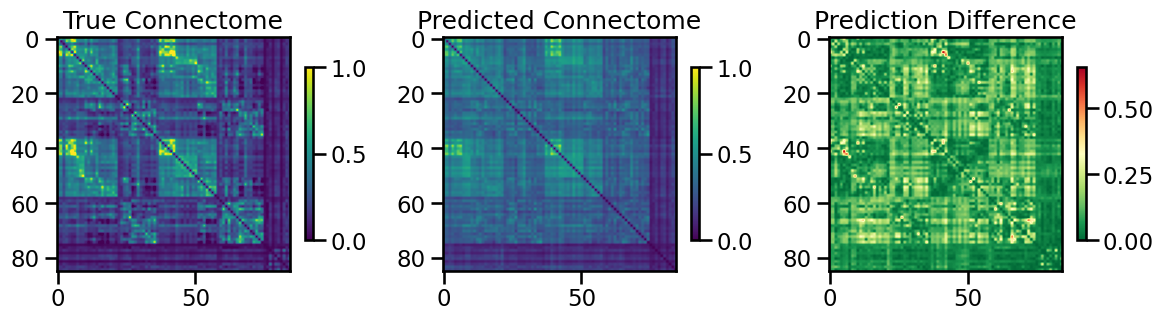

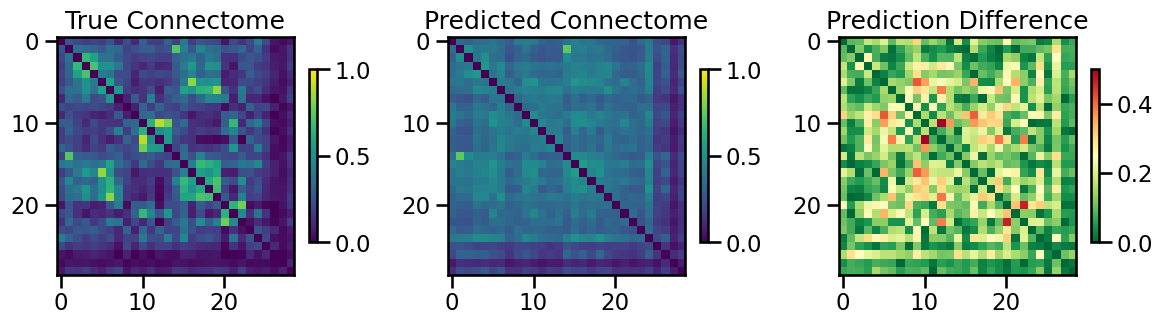


TRAIN METRICS: {'mse': 0.02140486848768498, 'mae': 0.10369250511846882, 'r2': 0.3821681872887086, 'pearson_corr': 0.6956745166250204, 'geodesic_distance': 8.784780015549998}
TEST METRICS: {'mse': 0.0346907891329829, 'mae': 0.14420081323391334, 'r2': -0.20039280069945797, 'pearson_corr': 0.4641255404818202, 'geodesic_distance': 7.915992336142799}
BEST VAL SCORE 0.033522471157272186
BEST MODEL PARAMS {'input_dim': 22106, 'hidden_dims': [512, 256, 128], 'dropout_rate': 0.1, 'learning_rate': 0.0003, 'weight_decay': 0, 'batch_size': 128, 'symmetry_weight': 0, 'epochs': 200, 'device': 'cuda'}


  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.
CPU Usage: 38.4%
RAM Usage: 9.8%
Available RAM: 908.7G
Total RAM: 1007.0G
| ID | GPU | MEM |
------------------
|  0 |  0% | 15% |

 Test fold num: 2 X_train shape: (7140, 22106) Y_train shape: (7140,) X_test shape: (812, 22106) Y_test shape: (812,)
SEARCH METHOD ('wandb', 'mse', 5)
1
3
4
Create sweep with ID: y54fcfri
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/y54fcfri


wandb: Agent Starting Run: oea5hrnl with config:
wandb: 	batch_size: 256
wandb: 	dropout_rate: 0.1
wandb: 	epochs: 100
wandb: 	hidden_dims: [256, 128]
wandb: 	input_dim: 22106
wandb: 	learning_rate: 0.0001
wandb: 	symmetry_weight: 0
wandb: 	weight_decay: 0.01
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0
Epoch 10/100, Train Loss: 0.1192, Val Loss: 63.1180
Epoch 20/100, Train Loss: 0.0797, Val Loss: 0.0390
Epoch 30/100, Train Loss: 0.0643, Val Loss: 0.0381
Epoch 40/100, Train Loss: 0.0539, Val Loss: 0.0285
Epoch 50/100, Train Loss: 0.0475, Val Loss: 0.0242
Epoch 60/100, Train Loss: 0.0391, Val Loss: 0.0272
Epoch 70/100, Train Loss: 0.0388, Val Loss: 0.0308
Epoch 80/100, Train Loss: 0.0371, Val Loss: 0.0255
Epoch 90/100, Train Loss: 0.0333, Val Loss: 0.0322
Epoch 100/100, Train Loss: 0.0318, Val Loss: 0.0334
Processing inner fold 1
Epoch 10/100, Train Loss: 0.0833, Val Loss: 0.5201
Epoch 20/100, Train Loss: 0.0609, Val Loss: 0.0313
Epoch 30/100, Train Loss: 0.0512, Val Loss: 0.0307
Epoch 40/100, Train Loss: 0.0467, Val Loss: 0.0344
Epoch 50/100, Train Loss: 0.0404, Val Loss: 0.0371
Epoch 60/100, Train Loss: 0.0359, Val Loss: 0.0324
Epoch 70/100, Train Loss: 0.0332, Val Loss: 0.0283
Epoch 80/100, Train Loss: 0.0273, Val Loss: 0.0331
Epoch 90/100, Train Loss: 0.0271

  return tuple(tensor[index] for tensor in self.tensors)

  return tuple(tensor[index] for tensor in self.tensors)



Epoch 10/100, Train Loss: 0.1281, Val Loss: 2.6358
Epoch 20/100, Train Loss: 0.0949, Val Loss: 0.0611
Epoch 30/100, Train Loss: 0.0709, Val Loss: 0.0421
Epoch 40/100, Train Loss: 0.0555, Val Loss: 0.0429
Epoch 50/100, Train Loss: 0.0477, Val Loss: 0.0220
Epoch 60/100, Train Loss: 0.0390, Val Loss: 0.0269
Epoch 70/100, Train Loss: 0.0365, Val Loss: 0.0269
Epoch 80/100, Train Loss: 0.0338, Val Loss: 0.0308
Epoch 90/100, Train Loss: 0.0307, Val Loss: 0.0205
Epoch 100/100, Train Loss: 0.0297, Val Loss: 0.0314


wandb: Agent Starting Run: tnpv5d6x with config:
wandb: 	batch_size: 256
wandb: 	dropout_rate: 0.1
wandb: 	epochs: 100
wandb: 	hidden_dims: [512, 256, 128]
wandb: 	input_dim: 22106
wandb: 	learning_rate: 0.0003
wandb: 	symmetry_weight: 0
wandb: 	weight_decay: 0
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0
Epoch 10/100, Train Loss: 0.0834, Val Loss: 0.0350
Epoch 20/100, Train Loss: 0.0551, Val Loss: 0.0265
Epoch 30/100, Train Loss: 0.0447, Val Loss: 0.0278
Epoch 40/100, Train Loss: 0.0382, Val Loss: 0.0254
Epoch 50/100, Train Loss: 0.0318, Val Loss: 0.0260
Epoch 60/100, Train Loss: 0.0270, Val Loss: 0.0256
Epoch 70/100, Train Loss: 0.0228, Val Loss: 0.0244
Epoch 80/100, Train Loss: 0.0193, Val Loss: 0.0246
Epoch 90/100, Train Loss: 0.0168, Val Loss: 0.0241
Epoch 100/100, Train Loss: 0.0148, Val Loss: 0.0258
Processing inner fold 1
Epoch 10/100, Train Loss: 0.0617, Val Loss: 0.0303
Epoch 20/100, Train Loss: 0.0436, Val Loss: 0.0286
Epoch 30/100, Train Loss: 0.0359, Val Loss: 0.0286
Epoch 40/100, Train Loss: 0.0288, Val Loss: 0.0276
Epoch 50/100, Train Loss: 0.0249, Val Loss: 0.0306
Epoch 60/100, Train Loss: 0.0204, Val Loss: 0.0311
Epoch 70/100, Train Loss: 0.0166, Val Loss: 0.0326
Epoch 80/100, Train Loss: 0.0138, Val Loss: 0.0333
Epoch 90/100, Train Loss: 0.0125,

  return tuple(tensor[index] for tensor in self.tensors)



Epoch 30/100, Train Loss: 0.0377, Val Loss: 0.0224
Epoch 40/100, Train Loss: 0.0329, Val Loss: 0.0278
Epoch 50/100, Train Loss: 0.0224, Val Loss: 0.0205
Epoch 60/100, Train Loss: 0.0178, Val Loss: 0.0219
Epoch 70/100, Train Loss: 0.0157, Val Loss: 0.0184
Epoch 80/100, Train Loss: 0.0124, Val Loss: 0.0224
Epoch 90/100, Train Loss: 0.0106, Val Loss: 0.0236
Epoch 100/100, Train Loss: 0.0091, Val Loss: 0.0223


wandb: Agent Starting Run: e1qson22 with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.2
wandb: 	epochs: 100
wandb: 	hidden_dims: [512, 256, 128]
wandb: 	input_dim: 22106
wandb: 	learning_rate: 0.0001
wandb: 	symmetry_weight: 0
wandb: 	weight_decay: 0.01
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0
Epoch 10/100, Train Loss: 0.1614, Val Loss: 0.0471
Epoch 20/100, Train Loss: 0.1073, Val Loss: 0.0301
Epoch 30/100, Train Loss: 0.0777, Val Loss: 0.0218
Epoch 40/100, Train Loss: 0.0633, Val Loss: 0.0250
Epoch 50/100, Train Loss: 0.0464, Val Loss: 0.0245
Epoch 60/100, Train Loss: 0.0412, Val Loss: 0.0251
Epoch 70/100, Train Loss: 0.0331, Val Loss: 0.0283
Epoch 80/100, Train Loss: 0.0282, Val Loss: 0.0284
Epoch 90/100, Train Loss: 0.0251, Val Loss: 0.0324
Epoch 100/100, Train Loss: 0.0234, Val Loss: 0.0308
Processing inner fold 1
Epoch 10/100, Train Loss: 0.1203, Val Loss: 0.0584
Epoch 20/100, Train Loss: 0.0875, Val Loss: 0.0322
Epoch 30/100, Train Loss: 0.0665, Val Loss: 0.0310
Epoch 40/100, Train Loss: 0.0532, Val Loss: 0.0323
Epoch 50/100, Train Loss: 0.0417, Val Loss: 0.0296
Epoch 60/100, Train Loss: 0.0329, Val Loss: 0.0296
Epoch 70/100, Train Loss: 0.0300, Val Loss: 0.0307
Epoch 80/100, Train Loss: 0.0246, Val Loss: 0.0289
Epoch 90/100, Train Loss: 0.0229,

wandb: Agent Starting Run: 8jwndnvd with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0
wandb: 	epochs: 200
wandb: 	hidden_dims: [256, 128]
wandb: 	input_dim: 22106
wandb: 	learning_rate: 0.0003
wandb: 	symmetry_weight: 0
wandb: 	weight_decay: 0.01
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0
Epoch 10/200, Train Loss: 0.0209, Val Loss: 0.1104
Epoch 20/200, Train Loss: 0.0271, Val Loss: 0.0808
Epoch 30/200, Train Loss: 0.0163, Val Loss: 0.0439
Epoch 40/200, Train Loss: 0.0164, Val Loss: 0.1172
Epoch 50/200, Train Loss: 0.0199, Val Loss: 0.0292
Epoch 60/200, Train Loss: 0.0120, Val Loss: 0.0317
Epoch 70/200, Train Loss: 0.0127, Val Loss: 0.0595
Epoch 80/200, Train Loss: 0.0113, Val Loss: 0.0304
Epoch 90/200, Train Loss: 0.0118, Val Loss: 0.2585
Epoch 100/200, Train Loss: 0.0112, Val Loss: 0.0438
Epoch 110/200, Train Loss: 0.0113, Val Loss: 0.0298
Epoch 120/200, Train Loss: 0.0116, Val Loss: 0.0407
Epoch 130/200, Train Loss: 0.0102, Val Loss: 0.0426
Epoch 140/200, Train Loss: 0.0106, Val Loss: 0.0283
Epoch 150/200, Train Loss: 0.0118, Val Loss: 0.0316


  transposed = list(zip(*batch))  # It may be accessed twice, so we use a list.

  transposed = list(zip(*batch))  # It may be accessed twice, so we use a list.



Epoch 160/200, Train Loss: 0.0097, Val Loss: 0.0345
Epoch 170/200, Train Loss: 0.0092, Val Loss: 0.0288
Epoch 180/200, Train Loss: 0.0100, Val Loss: 0.0344
Epoch 190/200, Train Loss: 0.0102, Val Loss: 0.0386
Epoch 200/200, Train Loss: 0.0110, Val Loss: 0.0390
Processing inner fold 1
Epoch 10/200, Train Loss: 0.0277, Val Loss: 0.0514
Epoch 20/200, Train Loss: 0.0217, Val Loss: 0.0343
Epoch 30/200, Train Loss: 0.0141, Val Loss: 0.0331
Epoch 40/200, Train Loss: 0.0148, Val Loss: 0.0524
Epoch 50/200, Train Loss: 0.0129, Val Loss: 0.0321
Epoch 60/200, Train Loss: 0.0128, Val Loss: 0.0544
Epoch 70/200, Train Loss: 0.0127, Val Loss: 0.0390
Epoch 80/200, Train Loss: 0.0120, Val Loss: 0.0309
Epoch 90/200, Train Loss: 0.0106, Val Loss: 0.0389
Epoch 100/200, Train Loss: 0.0111, Val Loss: 0.0379
Epoch 110/200, Train Loss: 0.0110, Val Loss: 0.0320
Epoch 120/200, Train Loss: 0.0120, Val Loss: 0.0642
Epoch 130/200, Train Loss: 0.0105, Val Loss: 0.0377
Epoch 140/200, Train Loss: 0.0130, Val Loss: 0.03

wandb: Agent Starting Run: ye37aodb with config:
wandb: 	batch_size: 256
wandb: 	dropout_rate: 0
wandb: 	epochs: 200
wandb: 	hidden_dims: [512, 256, 128]
wandb: 	input_dim: 22106
wandb: 	learning_rate: 0.0003
wandb: 	symmetry_weight: 0
wandb: 	weight_decay: 0
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0
Epoch 10/200, Train Loss: 0.0178, Val Loss: 0.0296
Epoch 20/200, Train Loss: 0.0114, Val Loss: 0.0290
Epoch 30/200, Train Loss: 0.0334, Val Loss: 0.0413
Epoch 40/200, Train Loss: 0.0086, Val Loss: 0.0263
Epoch 50/200, Train Loss: 0.0080, Val Loss: 0.0317
Epoch 60/200, Train Loss: 0.0098, Val Loss: 0.0274
Epoch 70/200, Train Loss: 0.0080, Val Loss: 0.0259
Epoch 80/200, Train Loss: 0.0051, Val Loss: 0.0338
Epoch 90/200, Train Loss: 0.0069, Val Loss: 0.0301
Epoch 100/200, Train Loss: 0.0052, Val Loss: 0.0305
Epoch 110/200, Train Loss: 0.0039, Val Loss: 0.0282
Epoch 120/200, Train Loss: 0.0041, Val Loss: 0.0257


  return tuple(tensor[index] for tensor in self.tensors)



Epoch 130/200, Train Loss: 0.0040, Val Loss: 0.0291
Epoch 140/200, Train Loss: 0.0063, Val Loss: 0.0316
Epoch 150/200, Train Loss: 0.0043, Val Loss: 0.0268
Epoch 160/200, Train Loss: 0.0029, Val Loss: 0.0276
Epoch 170/200, Train Loss: 0.0049, Val Loss: 0.0308
Epoch 180/200, Train Loss: 0.0043, Val Loss: 0.0304
Epoch 190/200, Train Loss: 0.0040, Val Loss: 0.0290
Epoch 200/200, Train Loss: 0.0032, Val Loss: 0.0279
Processing inner fold 1
Epoch 10/200, Train Loss: 0.0349, Val Loss: 0.0385
Epoch 20/200, Train Loss: 0.0109, Val Loss: 0.0300
Epoch 30/200, Train Loss: 0.0122, Val Loss: 0.0473
Epoch 40/200, Train Loss: 0.0083, Val Loss: 0.0310
Epoch 50/200, Train Loss: 0.0096, Val Loss: 0.0337
Epoch 60/200, Train Loss: 0.0079, Val Loss: 0.0319
Epoch 70/200, Train Loss: 0.0080, Val Loss: 0.0338
Epoch 80/200, Train Loss: 0.0053, Val Loss: 0.0349
Epoch 90/200, Train Loss: 0.0053, Val Loss: 0.0414
Epoch 100/200, Train Loss: 0.0063, Val Loss: 0.0359
Epoch 110/200, Train Loss: 0.0054, Val Loss: 0.03

wandb: Sorting runs by +summary_metrics.mean_val_loss


Epoch 10/100, Train Loss: 0.0466, Val Loss: 0.0240
Epoch 20/100, Train Loss: 0.0309, Val Loss: 0.0203
Epoch 30/100, Train Loss: 0.0202, Val Loss: 0.0220
Epoch 40/100, Train Loss: 0.0142, Val Loss: 0.0256
Epoch 50/100, Train Loss: 0.0110, Val Loss: 0.0316
Epoch 60/100, Train Loss: 0.0086, Val Loss: 0.0274
Epoch 70/100, Train Loss: 0.0071, Val Loss: 0.0322
Epoch 80/100, Train Loss: 0.0063, Val Loss: 0.0341
Epoch 90/100, Train Loss: 0.0057, Val Loss: 0.0262
Epoch 100/100, Train Loss: 0.0051, Val Loss: 0.0270


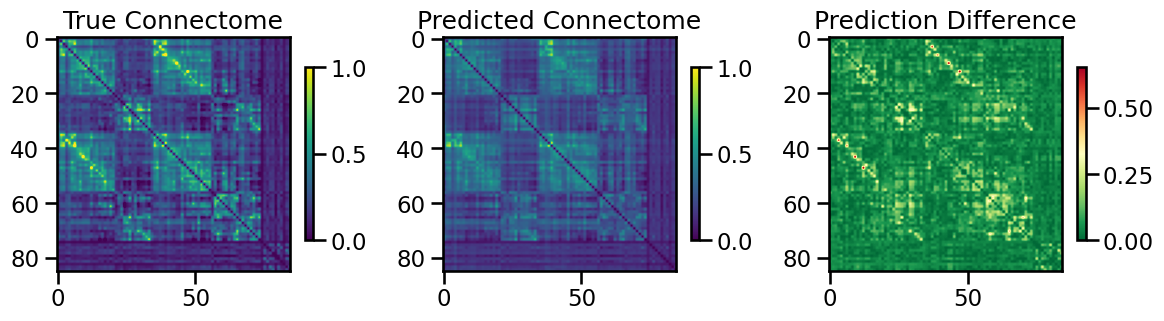

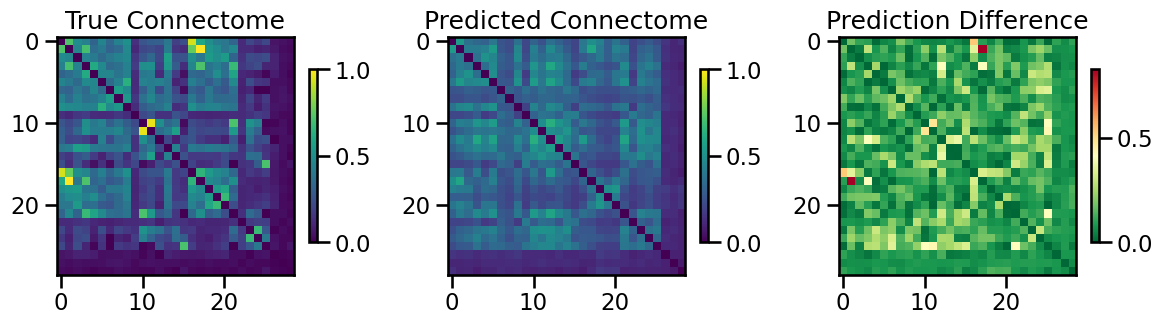


TRAIN METRICS: {'mse': 0.014165736449111798, 'mae': 0.0882223686019334, 'r2': 0.5423904113277318, 'pearson_corr': 0.7466587355417157, 'geodesic_distance': 7.501309897758211}
TEST METRICS: {'mse': 0.029634930010358856, 'mae': 0.1324058850482378, 'r2': 0.20175346928602977, 'pearson_corr': 0.5495360044508788, 'geodesic_distance': 5.506462269992178}
BEST VAL SCORE 0.02701897846741809
BEST MODEL PARAMS {'input_dim': 22106, 'hidden_dims': [512, 256, 128], 'dropout_rate': 0.1, 'learning_rate': 0.0003, 'weight_decay': 0, 'batch_size': 256, 'symmetry_weight': 0, 'epochs': 100, 'device': 'cuda'}


  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.
CPU Usage: 38.4%
RAM Usage: 9.8%
Available RAM: 908.7G
Total RAM: 1007.0G
| ID | GPU | MEM |
------------------
|  0 |  0% | 15% |

 Test fold num: 3 X_train shape: (7310, 22106) Y_train shape: (7310,) X_test shape: (756, 22106) Y_test shape: (756,)
SEARCH METHOD ('wandb', 'mse', 5)
1
2
4
Create sweep with ID: ogutaz85
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/ogutaz85


wandb: Agent Starting Run: rwbly8lg with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0
wandb: 	epochs: 100
wandb: 	hidden_dims: [512, 256, 128]
wandb: 	input_dim: 22106
wandb: 	learning_rate: 0.0003
wandb: 	symmetry_weight: 0
wandb: 	weight_decay: 0
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0


  warnings.warn(*args, **kwargs)  # noqa: B028



Epoch 10/100, Train Loss: 0.0166, Val Loss: 0.0355
Epoch 20/100, Train Loss: 0.0184, Val Loss: 0.0510
Epoch 30/100, Train Loss: 0.0134, Val Loss: 0.0377
Epoch 40/100, Train Loss: 0.0128, Val Loss: 0.0334
Epoch 50/100, Train Loss: 0.0134, Val Loss: 0.0361
Epoch 60/100, Train Loss: 0.0093, Val Loss: 0.0327
Epoch 70/100, Train Loss: 0.0092, Val Loss: 0.0327
Epoch 80/100, Train Loss: 0.0078, Val Loss: 0.0313
Epoch 90/100, Train Loss: 0.0089, Val Loss: 0.0394
Epoch 100/100, Train Loss: 0.0084, Val Loss: 0.0339
Processing inner fold 1
Epoch 10/100, Train Loss: 0.0222, Val Loss: 0.0365
Epoch 20/100, Train Loss: 0.0187, Val Loss: 0.0295
Epoch 30/100, Train Loss: 0.0091, Val Loss: 0.0278
Epoch 40/100, Train Loss: 0.0146, Val Loss: 0.0454
Epoch 50/100, Train Loss: 0.0085, Val Loss: 0.0242
Epoch 60/100, Train Loss: 0.0066, Val Loss: 0.0244
Epoch 70/100, Train Loss: 0.0094, Val Loss: 0.0272
Epoch 80/100, Train Loss: 0.0059, Val Loss: 0.0282
Epoch 90/100, Train Loss: 0.0070, Val Loss: 0.0271
Epoch 

wandb: Agent Starting Run: owb1de0n with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.1
wandb: 	epochs: 100
wandb: 	hidden_dims: [512, 256, 128]
wandb: 	input_dim: 22106
wandb: 	learning_rate: 0.0001
wandb: 	symmetry_weight: 0
wandb: 	weight_decay: 0
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0


  warnings.warn(*args, **kwargs)  # noqa: B028



Epoch 10/100, Train Loss: 0.1010, Val Loss: 0.0559
Epoch 20/100, Train Loss: 0.0655, Val Loss: 0.0374
Epoch 30/100, Train Loss: 0.0474, Val Loss: 0.0296
Epoch 40/100, Train Loss: 0.0372, Val Loss: 0.0255
Epoch 50/100, Train Loss: 0.0337, Val Loss: 0.0263
Epoch 60/100, Train Loss: 0.0301, Val Loss: 0.0246
Epoch 70/100, Train Loss: 0.0272, Val Loss: 0.0274
Epoch 80/100, Train Loss: 0.0234, Val Loss: 0.0305
Epoch 90/100, Train Loss: 0.0212, Val Loss: 0.0300
Epoch 100/100, Train Loss: 0.0190, Val Loss: 0.0285
Processing inner fold 1
Epoch 10/100, Train Loss: 0.0769, Val Loss: 0.0237
Epoch 20/100, Train Loss: 0.0492, Val Loss: 0.0222


  transposed = list(zip(*batch))  # It may be accessed twice, so we use a list.

  transposed = list(zip(*batch))  # It may be accessed twice, so we use a list.

  transposed = list(zip(*batch))  # It may be accessed twice, so we use a list.



Epoch 30/100, Train Loss: 0.0367, Val Loss: 0.0197
Epoch 40/100, Train Loss: 0.0316, Val Loss: 0.0224
Epoch 50/100, Train Loss: 0.0256, Val Loss: 0.0247
Epoch 60/100, Train Loss: 0.0224, Val Loss: 0.0258
Epoch 70/100, Train Loss: 0.0199, Val Loss: 0.0254
Epoch 80/100, Train Loss: 0.0181, Val Loss: 0.0265
Epoch 90/100, Train Loss: 0.0159, Val Loss: 0.0289
Epoch 100/100, Train Loss: 0.0144, Val Loss: 0.0301
Processing inner fold 2
Epoch 10/100, Train Loss: 0.0701, Val Loss: 0.0286
Epoch 20/100, Train Loss: 0.0502, Val Loss: 0.0236
Epoch 30/100, Train Loss: 0.0388, Val Loss: 0.0241
Epoch 40/100, Train Loss: 0.0347, Val Loss: 0.0225
Epoch 50/100, Train Loss: 0.0266, Val Loss: 0.0224
Epoch 60/100, Train Loss: 0.0236, Val Loss: 0.0235
Epoch 70/100, Train Loss: 0.0205, Val Loss: 0.0267
Epoch 80/100, Train Loss: 0.0177, Val Loss: 0.0257
Epoch 90/100, Train Loss: 0.0161, Val Loss: 0.0286
Epoch 100/100, Train Loss: 0.0140, Val Loss: 0.0316


wandb: Agent Starting Run: uar91u57 with config:
wandb: 	batch_size: 256
wandb: 	dropout_rate: 0.2
wandb: 	epochs: 100
wandb: 	hidden_dims: [512, 256, 128]
wandb: 	input_dim: 22106
wandb: 	learning_rate: 0.0001
wandb: 	symmetry_weight: 0
wandb: 	weight_decay: 0
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0
Epoch 10/100, Train Loss: 0.1678, Val Loss: 0.0433
Epoch 20/100, Train Loss: 0.1321, Val Loss: 0.0264
Epoch 30/100, Train Loss: 0.0958, Val Loss: 0.0231
Epoch 40/100, Train Loss: 0.0789, Val Loss: 0.0205
Epoch 50/100, Train Loss: 0.0656, Val Loss: 0.0212
Epoch 60/100, Train Loss: 0.0547, Val Loss: 0.0195
Epoch 70/100, Train Loss: 0.0472, Val Loss: 0.0188
Epoch 80/100, Train Loss: 0.0464, Val Loss: 0.0198
Epoch 90/100, Train Loss: 0.0382, Val Loss: 0.0201
Epoch 100/100, Train Loss: 0.0340, Val Loss: 0.0199
Processing inner fold 1
Epoch 10/100, Train Loss: 0.1248, Val Loss: 0.0414
Epoch 20/100, Train Loss: 0.0898, Val Loss: 0.0254
Epoch 30/100, Train Loss: 0.0720, Val Loss: 0.0213
Epoch 40/100, Train Loss: 0.0611, Val Loss: 0.0187
Epoch 50/100, Train Loss: 0.0510, Val Loss: 0.0199
Epoch 60/100, Train Loss: 0.0445, Val Loss: 0.0180
Epoch 70/100, Train Loss: 0.0385, Val Loss: 0.0182
Epoch 80/100, Train Loss: 0.0321, Val Loss: 0.0179
Epoch 90/100, Train Loss: 0.0277,

  return tuple(tensor[index] for tensor in self.tensors)



Epoch 20/100, Train Loss: 0.1076, Val Loss: 0.0412
Epoch 30/100, Train Loss: 0.0889, Val Loss: 0.0358
Epoch 40/100, Train Loss: 0.0652, Val Loss: 0.0287
Epoch 50/100, Train Loss: 0.0560, Val Loss: 0.0245
Epoch 60/100, Train Loss: 0.0493, Val Loss: 0.0202
Epoch 70/100, Train Loss: 0.0424, Val Loss: 0.0194
Epoch 80/100, Train Loss: 0.0361, Val Loss: 0.0224
Epoch 90/100, Train Loss: 0.0327, Val Loss: 0.0227
Epoch 100/100, Train Loss: 0.0280, Val Loss: 0.0214


wandb: Agent Starting Run: sjuf7c4u with config:
wandb: 	batch_size: 256
wandb: 	dropout_rate: 0.2
wandb: 	epochs: 100
wandb: 	hidden_dims: [512, 256, 128]
wandb: 	input_dim: 22106
wandb: 	learning_rate: 0.0001
wandb: 	symmetry_weight: 0
wandb: 	weight_decay: 0.01
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0
Epoch 10/100, Train Loss: 0.1302, Val Loss: 5.2338
Epoch 20/100, Train Loss: 0.0990, Val Loss: 0.0241
Epoch 30/100, Train Loss: 0.0803, Val Loss: 0.0209
Epoch 40/100, Train Loss: 0.0634, Val Loss: 0.0253
Epoch 50/100, Train Loss: 0.0538, Val Loss: 0.0215
Epoch 60/100, Train Loss: 0.0464, Val Loss: 0.0216
Epoch 70/100, Train Loss: 0.0388, Val Loss: 0.0213
Epoch 80/100, Train Loss: 0.0346, Val Loss: 0.0255
Epoch 90/100, Train Loss: 0.0298, Val Loss: 0.0207
Epoch 100/100, Train Loss: 0.0257, Val Loss: 0.0383
Processing inner fold 1
Epoch 10/100, Train Loss: 0.1506, Val Loss: 3.3459
Epoch 20/100, Train Loss: 0.1081, Val Loss: 0.0315
Epoch 30/100, Train Loss: 0.0858, Val Loss: 0.0332
Epoch 40/100, Train Loss: 0.0700, Val Loss: 0.0215
Epoch 50/100, Train Loss: 0.0561, Val Loss: 0.0329
Epoch 60/100, Train Loss: 0.0463, Val Loss: 0.0227
Epoch 70/100, Train Loss: 0.0430, Val Loss: 0.0198
Epoch 80/100, Train Loss: 0.0370, Val Loss: 0.0178
Epoch 90/100, Train Loss: 0.0318,

  return tuple(tensor[index] for tensor in self.tensors)



Epoch 30/100, Train Loss: 0.0833, Val Loss: 0.0334
Epoch 40/100, Train Loss: 0.0660, Val Loss: 0.0228
Epoch 50/100, Train Loss: 0.0578, Val Loss: 0.0215
Epoch 60/100, Train Loss: 0.0490, Val Loss: 0.0192
Epoch 70/100, Train Loss: 0.0393, Val Loss: 0.0196
Epoch 80/100, Train Loss: 0.0379, Val Loss: 0.0253
Epoch 90/100, Train Loss: 0.0321, Val Loss: 0.0203
Epoch 100/100, Train Loss: 0.0276, Val Loss: 0.0245


wandb: Agent Starting Run: ztyc1i3b with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.2
wandb: 	epochs: 100
wandb: 	hidden_dims: [512, 256, 128]
wandb: 	input_dim: 22106
wandb: 	learning_rate: 0.0003
wandb: 	symmetry_weight: 0
wandb: 	weight_decay: 0.01
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0


  warnings.warn(*args, **kwargs)  # noqa: B028



Epoch 10/100, Train Loss: 0.0752, Val Loss: 0.0261
Epoch 20/100, Train Loss: 0.0416, Val Loss: 0.0219
Epoch 30/100, Train Loss: 0.0285, Val Loss: 0.0214
Epoch 40/100, Train Loss: 0.0220, Val Loss: 0.0233
Epoch 50/100, Train Loss: 0.0176, Val Loss: 0.0647
Epoch 60/100, Train Loss: 0.0162, Val Loss: 0.0499
Epoch 70/100, Train Loss: 0.0149, Val Loss: 0.0191
Epoch 80/100, Train Loss: 0.0143, Val Loss: 0.0220
Epoch 90/100, Train Loss: 0.0137, Val Loss: 0.0199
Epoch 100/100, Train Loss: 0.0144, Val Loss: 0.0264
Processing inner fold 1
Epoch 10/100, Train Loss: 0.0781, Val Loss: 0.0221
Epoch 20/100, Train Loss: 0.0439, Val Loss: 0.0250
Epoch 30/100, Train Loss: 0.0277, Val Loss: 0.0292
Epoch 40/100, Train Loss: 0.0216, Val Loss: 0.0281
Epoch 50/100, Train Loss: 0.0185, Val Loss: 0.0233
Epoch 60/100, Train Loss: 0.0163, Val Loss: 0.0249
Epoch 70/100, Train Loss: 0.0146, Val Loss: 0.0241
Epoch 80/100, Train Loss: 0.0130, Val Loss: 0.0261
Epoch 90/100, Train Loss: 0.0135, Val Loss: 0.0214
Epoch 

wandb: Sorting runs by +summary_metrics.mean_val_loss


Epoch 10/100, Train Loss: 0.0962, Val Loss: 0.0334
Epoch 20/100, Train Loss: 0.0600, Val Loss: 0.0295
Epoch 30/100, Train Loss: 0.0442, Val Loss: 0.0298


  return tuple(tensor[index] for tensor in self.tensors)



Epoch 40/100, Train Loss: 0.0325, Val Loss: 0.0315
Epoch 50/100, Train Loss: 0.0246, Val Loss: 0.0335
Epoch 60/100, Train Loss: 0.0200, Val Loss: 0.0371
Epoch 70/100, Train Loss: 0.0168, Val Loss: 0.0371
Epoch 80/100, Train Loss: 0.0139, Val Loss: 0.0366
Epoch 90/100, Train Loss: 0.0119, Val Loss: 0.0432
Epoch 100/100, Train Loss: 0.0105, Val Loss: 0.0471


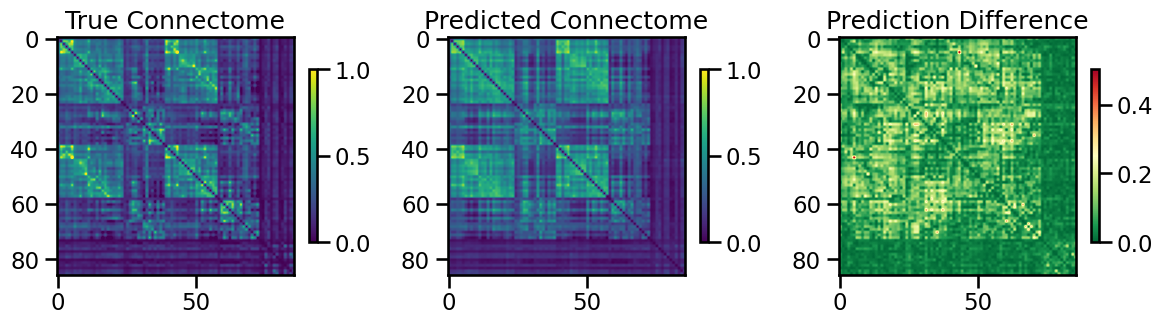

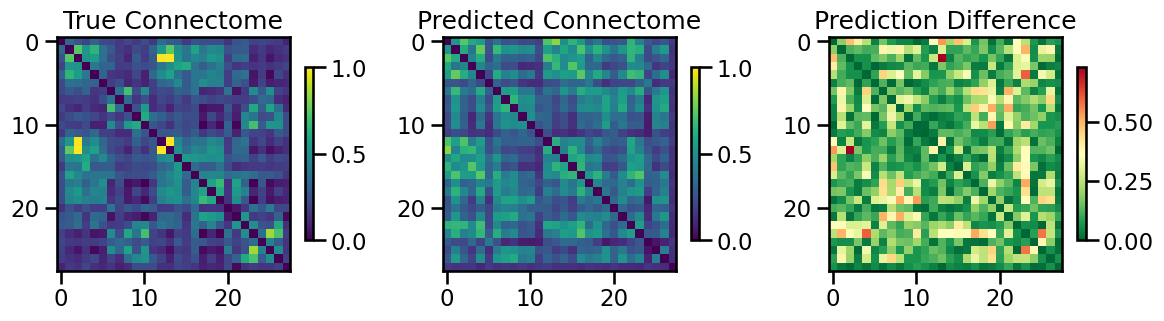


TRAIN METRICS: {'mse': 0.011198309330124001, 'mae': 0.07811942678641597, 'r2': 0.6580359246738182, 'pearson_corr': 0.8798384249286115, 'geodesic_distance': 9.185080284954665}
TEST METRICS: {'mse': 0.04714165350376778, 'mae': 0.16549846071920105, 'r2': -0.5911522643591332, 'pearson_corr': 0.330542375256888, 'geodesic_distance': 5.46798211402291}
BEST VAL SCORE 0.020264210360538628
BEST MODEL PARAMS {'input_dim': 22106, 'hidden_dims': [512, 256, 128], 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'weight_decay': 0, 'batch_size': 256, 'symmetry_weight': 0, 'epochs': 100, 'device': 'cuda'}


  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.
CPU Usage: 38.2%
RAM Usage: 9.8%
Available RAM: 908.7G
Total RAM: 1007.0G
| ID | GPU | MEM |
------------------
|  0 |  0% | 15% |

 Test fold num: 4 X_train shape: (7310, 22106) Y_train shape: (7310,) X_test shape: (756, 22106) Y_test shape: (756,)
SEARCH METHOD ('wandb', 'mse', 5)
1
2
3
Create sweep with ID: lj0b1m0n
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/lj0b1m0n


wandb: Agent Starting Run: q7nojtcc with config:
wandb: 	batch_size: 256
wandb: 	dropout_rate: 0.2
wandb: 	epochs: 100
wandb: 	hidden_dims: [256, 128]
wandb: 	input_dim: 22106
wandb: 	learning_rate: 0.0001
wandb: 	symmetry_weight: 0
wandb: 	weight_decay: 0.01
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0
Epoch 10/100, Train Loss: 0.2031, Val Loss: 0.8997
Epoch 20/100, Train Loss: 0.1394, Val Loss: 0.0593
Epoch 30/100, Train Loss: 0.1155, Val Loss: 0.0434
Epoch 40/100, Train Loss: 0.0899, Val Loss: 0.0376
Epoch 50/100, Train Loss: 0.0737, Val Loss: 0.0454
Epoch 60/100, Train Loss: 0.0638, Val Loss: 0.0368
Epoch 70/100, Train Loss: 0.0551, Val Loss: 0.1509
Epoch 80/100, Train Loss: 0.0544, Val Loss: 0.0237
Epoch 90/100, Train Loss: 0.0424, Val Loss: 0.0224
Epoch 100/100, Train Loss: 0.0418, Val Loss: 0.0279
Processing inner fold 1
Epoch 10/100, Train Loss: 0.1763, Val Loss: 0.6090
Epoch 20/100, Train Loss: 0.1259, Val Loss: 0.0568
Epoch 30/100, Train Loss: 0.1031, Val Loss: 0.0462


  return tuple(tensor[index] for tensor in self.tensors)

  return tuple(tensor[index] for tensor in self.tensors)



Epoch 40/100, Train Loss: 0.0837, Val Loss: 0.0303
Epoch 50/100, Train Loss: 0.0758, Val Loss: 0.0266
Epoch 60/100, Train Loss: 0.0643, Val Loss: 0.0272
Epoch 70/100, Train Loss: 0.0519, Val Loss: 0.0314
Epoch 80/100, Train Loss: 0.0471, Val Loss: 0.0201
Epoch 90/100, Train Loss: 0.0411, Val Loss: 0.0236
Epoch 100/100, Train Loss: 0.0368, Val Loss: 0.0299
Processing inner fold 2
Epoch 10/100, Train Loss: 0.1673, Val Loss: 27.0351
Epoch 20/100, Train Loss: 0.1247, Val Loss: 0.0386
Epoch 30/100, Train Loss: 0.1065, Val Loss: 0.0311
Epoch 40/100, Train Loss: 0.0793, Val Loss: 0.0305
Epoch 50/100, Train Loss: 0.0716, Val Loss: 0.0309
Epoch 60/100, Train Loss: 0.0640, Val Loss: 0.0281
Epoch 70/100, Train Loss: 0.0557, Val Loss: 0.0331
Epoch 80/100, Train Loss: 0.0506, Val Loss: 0.0302
Epoch 90/100, Train Loss: 0.0401, Val Loss: 0.0309
Epoch 100/100, Train Loss: 0.0396, Val Loss: 0.0311


wandb: Agent Starting Run: j82be731 with config:
wandb: 	batch_size: 256
wandb: 	dropout_rate: 0
wandb: 	epochs: 200
wandb: 	hidden_dims: [256, 128]
wandb: 	input_dim: 22106
wandb: 	learning_rate: 0.0003
wandb: 	symmetry_weight: 0
wandb: 	weight_decay: 0
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0
Epoch 10/200, Train Loss: 0.0339, Val Loss: 0.0316
Epoch 20/200, Train Loss: 0.0178, Val Loss: 0.0474
Epoch 30/200, Train Loss: 0.0154, Val Loss: 0.0342
Epoch 40/200, Train Loss: 0.0104, Val Loss: 0.0302
Epoch 50/200, Train Loss: 0.0139, Val Loss: 0.0455
Epoch 60/200, Train Loss: 0.0091, Val Loss: 0.0291
Epoch 70/200, Train Loss: 0.0107, Val Loss: 0.0277
Epoch 80/200, Train Loss: 0.0089, Val Loss: 0.0343
Epoch 90/200, Train Loss: 0.0084, Val Loss: 0.0275
Epoch 100/200, Train Loss: 0.0073, Val Loss: 0.0340
Epoch 110/200, Train Loss: 0.0061, Val Loss: 0.0310
Epoch 120/200, Train Loss: 0.0088, Val Loss: 0.0269
Epoch 130/200, Train Loss: 0.0060, Val Loss: 0.0304
Epoch 140/200, Train Loss: 0.0057, Val Loss: 0.0327


  return tuple(tensor[index] for tensor in self.tensors)



Epoch 150/200, Train Loss: 0.0054, Val Loss: 0.0297
Epoch 160/200, Train Loss: 0.0062, Val Loss: 0.0389
Epoch 170/200, Train Loss: 0.0064, Val Loss: 0.0281
Epoch 180/200, Train Loss: 0.0061, Val Loss: 0.0284
Epoch 190/200, Train Loss: 0.0062, Val Loss: 0.0284
Epoch 200/200, Train Loss: 0.0050, Val Loss: 0.0288
Processing inner fold 1
Epoch 10/200, Train Loss: 0.0221, Val Loss: 0.0291
Epoch 20/200, Train Loss: 0.0227, Val Loss: 0.0701
Epoch 30/200, Train Loss: 0.0167, Val Loss: 0.0274
Epoch 40/200, Train Loss: 0.0116, Val Loss: 0.0282
Epoch 50/200, Train Loss: 0.0280, Val Loss: 0.0427
Epoch 60/200, Train Loss: 0.0082, Val Loss: 0.0278
Epoch 70/200, Train Loss: 0.0083, Val Loss: 0.0276
Epoch 80/200, Train Loss: 0.0074, Val Loss: 0.0268
Epoch 90/200, Train Loss: 0.0090, Val Loss: 0.0443
Epoch 100/200, Train Loss: 0.0079, Val Loss: 0.0330
Epoch 110/200, Train Loss: 0.0058, Val Loss: 0.0321
Epoch 120/200, Train Loss: 0.0056, Val Loss: 0.0292
Epoch 130/200, Train Loss: 0.0059, Val Loss: 0.03

wandb: Agent Starting Run: m3j5hbmg with config:
wandb: 	batch_size: 256
wandb: 	dropout_rate: 0.1
wandb: 	epochs: 100
wandb: 	hidden_dims: [512, 256, 128]
wandb: 	input_dim: 22106
wandb: 	learning_rate: 0.0003
wandb: 	symmetry_weight: 0
wandb: 	weight_decay: 0
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0
Epoch 10/100, Train Loss: 0.0922, Val Loss: 0.0501
Epoch 20/100, Train Loss: 0.0526, Val Loss: 0.0321
Epoch 30/100, Train Loss: 0.0463, Val Loss: 0.0288
Epoch 40/100, Train Loss: 0.0343, Val Loss: 0.0247
Epoch 50/100, Train Loss: 0.0279, Val Loss: 0.0210
Epoch 60/100, Train Loss: 0.0246, Val Loss: 0.0221
Epoch 70/100, Train Loss: 0.0213, Val Loss: 0.0219
Epoch 80/100, Train Loss: 0.0189, Val Loss: 0.0217
Epoch 90/100, Train Loss: 0.0159, Val Loss: 0.0208
Epoch 100/100, Train Loss: 0.0136, Val Loss: 0.0227
Processing inner fold 1
Epoch 10/100, Train Loss: 0.0899, Val Loss: 0.0324
Epoch 20/100, Train Loss: 0.0544, Val Loss: 0.0201
Epoch 30/100, Train Loss: 0.0463, Val Loss: 0.0269
Epoch 40/100, Train Loss: 0.0363, Val Loss: 0.0201
Epoch 50/100, Train Loss: 0.0309, Val Loss: 0.0242
Epoch 60/100, Train Loss: 0.0250, Val Loss: 0.0188
Epoch 70/100, Train Loss: 0.0194, Val Loss: 0.0197


  return tuple(tensor[index] for tensor in self.tensors)



Epoch 80/100, Train Loss: 0.0168, Val Loss: 0.0195
Epoch 90/100, Train Loss: 0.0147, Val Loss: 0.0220
Epoch 100/100, Train Loss: 0.0128, Val Loss: 0.0244
Processing inner fold 2
Epoch 10/100, Train Loss: 0.0756, Val Loss: 0.0397
Epoch 20/100, Train Loss: 0.0505, Val Loss: 0.0312
Epoch 30/100, Train Loss: 0.0382, Val Loss: 0.0294
Epoch 40/100, Train Loss: 0.0338, Val Loss: 0.0293
Epoch 50/100, Train Loss: 0.0263, Val Loss: 0.0294
Epoch 60/100, Train Loss: 0.0221, Val Loss: 0.0295
Epoch 70/100, Train Loss: 0.0197, Val Loss: 0.0315
Epoch 80/100, Train Loss: 0.0165, Val Loss: 0.0322
Epoch 90/100, Train Loss: 0.0149, Val Loss: 0.0324
Epoch 100/100, Train Loss: 0.0127, Val Loss: 0.0336


wandb: Agent Starting Run: zapvz14i with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0
wandb: 	epochs: 200
wandb: 	hidden_dims: [512, 256, 128]
wandb: 	input_dim: 22106
wandb: 	learning_rate: 0.0003
wandb: 	symmetry_weight: 0
wandb: 	weight_decay: 0
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0
Epoch 10/200, Train Loss: 0.0240, Val Loss: 0.0495
Epoch 20/200, Train Loss: 0.0152, Val Loss: 0.0382
Epoch 30/200, Train Loss: 0.0134, Val Loss: 0.0351
Epoch 40/200, Train Loss: 0.0105, Val Loss: 0.0372
Epoch 50/200, Train Loss: 0.0136, Val Loss: 0.0518
Epoch 60/200, Train Loss: 0.0130, Val Loss: 0.0389
Epoch 70/200, Train Loss: 0.0152, Val Loss: 0.0343
Epoch 80/200, Train Loss: 0.0087, Val Loss: 0.0291
Epoch 90/200, Train Loss: 0.0076, Val Loss: 0.0270
Epoch 100/200, Train Loss: 0.0096, Val Loss: 0.0411
Epoch 110/200, Train Loss: 0.0073, Val Loss: 0.0297
Epoch 120/200, Train Loss: 0.0068, Val Loss: 0.0291
Epoch 130/200, Train Loss: 0.0079, Val Loss: 0.0283
Epoch 140/200, Train Loss: 0.0070, Val Loss: 0.0356
Epoch 150/200, Train Loss: 0.0069, Val Loss: 0.0279
Epoch 160/200, Train Loss: 0.0068, Val Loss: 0.0308
Epoch 170/200, Train Loss: 0.0074, Val Loss: 0.0298
Epoch 180/200, Train Loss: 0.0070, Val Loss: 0.0276
Epoch 190/200, Train Loss: 0.0069, Val Loss: 0.02

  transposed = list(zip(*batch))  # It may be accessed twice, so we use a list.



Epoch 130/200, Train Loss: 0.0060, Val Loss: 0.0275
Epoch 140/200, Train Loss: 0.0063, Val Loss: 0.0331
Epoch 150/200, Train Loss: 0.0055, Val Loss: 0.0274
Epoch 160/200, Train Loss: 0.0059, Val Loss: 0.0288
Epoch 170/200, Train Loss: 0.0059, Val Loss: 0.0307
Epoch 180/200, Train Loss: 0.0051, Val Loss: 0.0286
Epoch 190/200, Train Loss: 0.0068, Val Loss: 0.0302
Epoch 200/200, Train Loss: 0.0051, Val Loss: 0.0295
Processing inner fold 2
Epoch 10/200, Train Loss: 0.0163, Val Loss: 0.0332
Epoch 20/200, Train Loss: 0.0170, Val Loss: 0.0395
Epoch 30/200, Train Loss: 0.0116, Val Loss: 0.0336
Epoch 40/200, Train Loss: 0.0178, Val Loss: 0.0537
Epoch 50/200, Train Loss: 0.0088, Val Loss: 0.0318
Epoch 60/200, Train Loss: 0.0123, Val Loss: 0.0352
Epoch 70/200, Train Loss: 0.0070, Val Loss: 0.0376
Epoch 80/200, Train Loss: 0.0076, Val Loss: 0.0383
Epoch 90/200, Train Loss: 0.0067, Val Loss: 0.0385
Epoch 100/200, Train Loss: 0.0074, Val Loss: 0.0442
Epoch 110/200, Train Loss: 0.0070, Val Loss: 0.03

wandb: Agent Starting Run: 699l4z3i with config:
wandb: 	batch_size: 256
wandb: 	dropout_rate: 0.1
wandb: 	epochs: 100
wandb: 	hidden_dims: [512, 256, 128]
wandb: 	input_dim: 22106
wandb: 	learning_rate: 0.0001
wandb: 	symmetry_weight: 0
wandb: 	weight_decay: 0
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0
Epoch 10/100, Train Loss: 0.0988, Val Loss: 0.0689
Epoch 20/100, Train Loss: 0.0714, Val Loss: 0.0376
Epoch 30/100, Train Loss: 0.0507, Val Loss: 0.0259
Epoch 40/100, Train Loss: 0.0437, Val Loss: 0.0260
Epoch 50/100, Train Loss: 0.0372, Val Loss: 0.0220
Epoch 60/100, Train Loss: 0.0346, Val Loss: 0.0237
Epoch 70/100, Train Loss: 0.0300, Val Loss: 0.0219
Epoch 80/100, Train Loss: 0.0258, Val Loss: 0.0215
Epoch 90/100, Train Loss: 0.0260, Val Loss: 0.0223
Epoch 100/100, Train Loss: 0.0225, Val Loss: 0.0217
Processing inner fold 1
Epoch 10/100, Train Loss: 0.1159, Val Loss: 0.0444
Epoch 20/100, Train Loss: 0.0829, Val Loss: 0.0395
Epoch 30/100, Train Loss: 0.0658, Val Loss: 0.0300
Epoch 40/100, Train Loss: 0.0545, Val Loss: 0.0296
Epoch 50/100, Train Loss: 0.0470, Val Loss: 0.0252
Epoch 60/100, Train Loss: 0.0440, Val Loss: 0.0231


  return tuple(tensor[index] for tensor in self.tensors)



Epoch 70/100, Train Loss: 0.0386, Val Loss: 0.0235
Epoch 80/100, Train Loss: 0.0323, Val Loss: 0.0248
Epoch 90/100, Train Loss: 0.0316, Val Loss: 0.0237
Epoch 100/100, Train Loss: 0.0273, Val Loss: 0.0221
Processing inner fold 2
Epoch 10/100, Train Loss: 0.0940, Val Loss: 0.0482
Epoch 20/100, Train Loss: 0.0643, Val Loss: 0.0364
Epoch 30/100, Train Loss: 0.0518, Val Loss: 0.0301
Epoch 40/100, Train Loss: 0.0420, Val Loss: 0.0299
Epoch 50/100, Train Loss: 0.0381, Val Loss: 0.0298
Epoch 60/100, Train Loss: 0.0302, Val Loss: 0.0316
Epoch 70/100, Train Loss: 0.0295, Val Loss: 0.0330
Epoch 80/100, Train Loss: 0.0283, Val Loss: 0.0352
Epoch 90/100, Train Loss: 0.0236, Val Loss: 0.0320
Epoch 100/100, Train Loss: 0.0226, Val Loss: 0.0308


wandb: Sorting runs by +summary_metrics.mean_val_loss


Epoch 10/100, Train Loss: 0.0982, Val Loss: 0.0582
Epoch 20/100, Train Loss: 0.0558, Val Loss: 0.0257
Epoch 30/100, Train Loss: 0.0431, Val Loss: 0.0225
Epoch 40/100, Train Loss: 0.0334, Val Loss: 0.0212
Epoch 50/100, Train Loss: 0.0278, Val Loss: 0.0194
Epoch 60/100, Train Loss: 0.0234, Val Loss: 0.0202
Epoch 70/100, Train Loss: 0.0196, Val Loss: 0.0200
Epoch 80/100, Train Loss: 0.0172, Val Loss: 0.0209
Epoch 90/100, Train Loss: 0.0143, Val Loss: 0.0211
Epoch 100/100, Train Loss: 0.0132, Val Loss: 0.0233


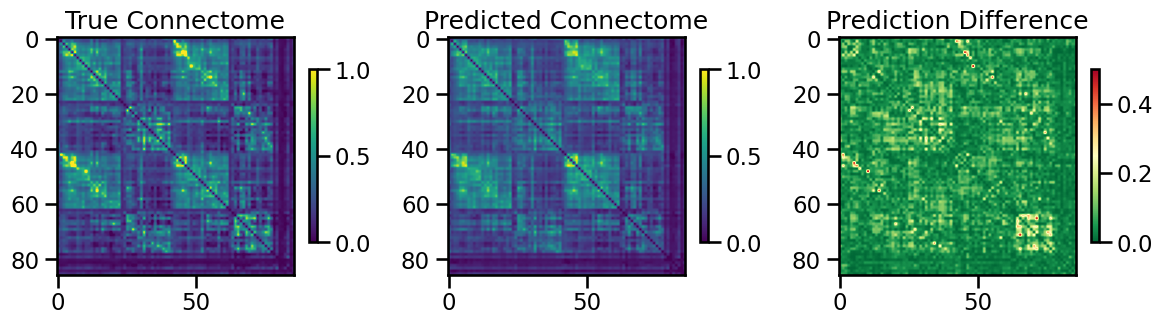

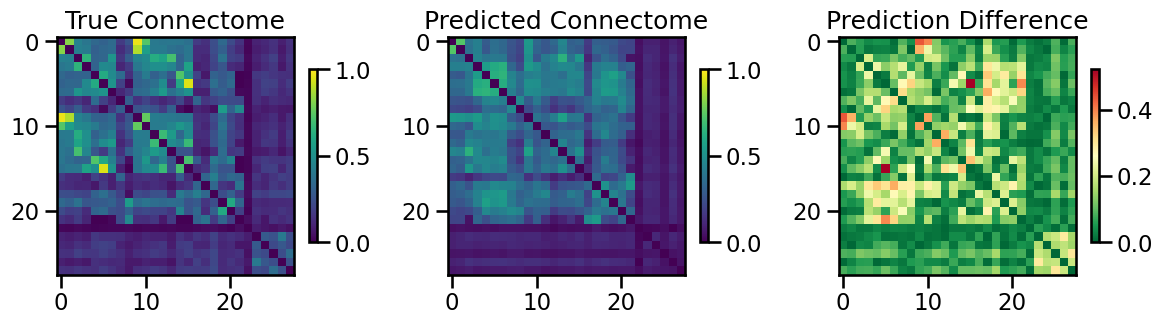


TRAIN METRICS: {'mse': 0.01007378557931937, 'mae': 0.07494574313980089, 'r2': 0.6998432593859057, 'pearson_corr': 0.8481063936006341, 'geodesic_distance': 7.287186569737609}
TEST METRICS: {'mse': 0.023354732011042517, 'mae': 0.11268573083084664, 'r2': 0.21995846488968962, 'pearson_corr': 0.6184290744792674, 'geodesic_distance': 5.725322069203411}
BEST VAL SCORE 0.02483810660325819
BEST MODEL PARAMS {'input_dim': 22106, 'hidden_dims': [512, 256, 128], 'dropout_rate': 0.1, 'learning_rate': 0.0001, 'weight_decay': 0, 'batch_size': 256, 'symmetry_weight': 0, 'epochs': 100, 'device': 'cuda'}


  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.
CPU Usage: 38.2%
RAM Usage: 9.8%
Available RAM: 908.7G
Total RAM: 1007.0G
| ID | GPU | MEM |
------------------
|  0 |  0% | 15% |


[[{'model_parameters': {'input_dim': 22106,
    'hidden_dims': [512, 256, 128],
    'dropout_rate': 0.1,
    'learning_rate': 0.0003,
    'weight_decay': 0,
    'batch_size': 128,
    'symmetry_weight': 0,
    'epochs': 200,
    'device': 'cuda'},
   'train_metrics': {'mse': 0.02140486848768498,
    'mae': 0.10369250511846882,
    'r2': 0.3821681872887086,
    'pearson_corr': 0.6956745166250204,
    'geodesic_distance': 8.784780015549998},
   'best_val_score': 0.033522471157272186,
   'test_metrics': {'mse': 0.0346907891329829,
    'mae': 0.14420081323391334,
    'r2': -0.20039280069945797,
    'pearson_corr': 0.4641255404818202,
    'geodesic_distance': 7.915992336142799},
   'y_true': array([ 0.25718  ,  0.25718  ,  0.21614  ,  0.21614  ,  0.17879  ,
           0.17879  ,  0.20003  ,  0.20003  ,  0.18572  ,  0.18572  ,
           0.25026  ,  0.25026  ,  0.11669  ,  0.11669  ,  0.24455  ,
           0.24455  ,  0.11424  ,  0.11424  ,  0.29925  ,  0.29925  ,
           0.18083  ,  0.18

In [140]:
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='dynamic_mlp',
              feature_type=[{'transcriptome': None}],
              connectome_target='FC',
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S100',
              gene_list='0.2',
              search_method=('wandb', 'mse', 5),
              save_sim=False,
              track_wandb=True
              )

gene list and higher res tests

In [10]:
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='xgboost',
              feature_type=[{'euclidean': None}],
              connectome_target='FC',
              use_gpu=True,
              use_shared_regions=True,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S100',
              gene_list='brain',
              search_method=('bayes', 'mse'),
              save_sim=False,
              track_wandb=False
              )

Number of components for PCA: 110
X shape: (390, 5478)
X_pca shape: (390, 110)
Y_sc shape: (390, 390)
Y_sc_spectralL shape: (390, 455)
Y_sc_spectralA shape: (390, 456)
Y_fc shape: (390, 390)
Coordinates shape: (390, 3)
Y shape (390, 390)
feature_name euclidean
processing_type None
X shape (390, 3)
Number of combinations: 42486
Region combinations: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 58), (0, 59), (0, 60), (0, 61), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 67), (0, 68), (0, 69), (0, 70), (0, 71), (0, 72), (0, 73), (

[[{'model_parameters': {'objective': 'reg:squarederror',
    'base_score': None,
    'booster': None,
    'callbacks': None,
    'colsample_bylevel': None,
    'colsample_bynode': None,
    'colsample_bytree': 0.8,
    'device': 'cuda',
    'early_stopping_rounds': None,
    'enable_categorical': False,
    'eval_metric': None,
    'feature_types': None,
    'gamma': None,
    'grow_policy': None,
    'importance_type': None,
    'interaction_constraints': None,
    'learning_rate': 0.3,
    'max_bin': None,
    'max_cat_threshold': None,
    'max_cat_to_onehot': None,
    'max_delta_step': None,
    'max_depth': 3,
    'max_leaves': None,
    'min_child_weight': None,
    'missing': nan,
    'monotone_constraints': None,
    'multi_strategy': None,
    'n_estimators': 250,
    'n_jobs': None,
    'num_parallel_tree': None,
    'random_state': 42,
    'reg_alpha': 0.1,
    'reg_lambda': 0.0001,
    'sampling_method': None,
    'scale_pos_weight': None,
    'subsample': 0.8,
    'tree_m

In [ ]:
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='dynamic_nn',
              feature_type=[{'transcriptome': None}],
              connectome_target='FC',
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=True,
              parcellation='S456',
              gene_list='brain',
              save_sim=False,
              search_method=('grid', 'mse'),
              track_wandb=True
              )

Number of components for PCA: 84
X shape: (339, 1906)
X_pca shape: (400, 84)
Y_sc shape: (339, 339)
Y_sc_spectralL shape: (339, 399)
Y_sc_spectralA shape: (339, 400)
Y_fc shape: (339, 339)
Coordinates shape: (339, 3)
Y shape (339, 339)
feature_name transcriptome
processing_type None
X shape (339, 1906)
Fold 0 shapes - X_train: (64262, 3812), X_test: (7140, 3812), Y_train: (64262,), Y_test: (7140,)
Fold 1 shapes - X_train: (64262, 3812), X_test: (7140, 3812), Y_train: (64262,), Y_test: (7140,)
Fold 2 shapes - X_train: (64262, 3812), X_test: (7140, 3812), Y_train: (64262,), Y_test: (7140,)
Fold 3 shapes - X_train: (64770, 3812), X_test: (6972, 3812), Y_train: (64770,), Y_test: (6972,)

 Test fold num: 1
(64262, 3812) (64262,) (7140, 3812) (7140,)
SEARCH METHOD ('grid', 'mse')


  return LooseVersion(v) >= LooseVersion(check)

ERROR: Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: asratzan (alexander-ratzan-new-york-university). Use `wandb login --relogin` to force relogin


2
3
4
Fold 0 shapes - X_train: (28392, 3812), X_test: (7140, 3812), Y_train: (28392,), Y_test: (7140,)
Fold 1 shapes - X_train: (28392, 3812), X_test: (7140, 3812), Y_train: (28392,), Y_test: (7140,)
Fold 2 shapes - X_train: (28730, 3812), X_test: (6972, 3812), Y_train: (28730,), Y_test: (6972,)
Create sweep with ID: yhgnmm91
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/yhgnmm91


wandb: Agent Starting Run: 33lfd62x with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.2
wandb: 	epochs: 200
wandb: 	hidden_dims: [128, 64]
wandb: 	input_dim: 3812
wandb: 	learning_rate: 0.0003
wandb: 	symmetry_weight: 0.1
wandb: 	weight_decay: 0.001
ERROR: Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0
Epoch 10/200, Train Loss: 0.0302, Val Loss: 0.0471


  transposed = list(zip(*batch))  # It may be accessed twice, so we use a list.



Epoch 20/200, Train Loss: 0.0286, Val Loss: 0.0446
Epoch 30/200, Train Loss: 0.0270, Val Loss: 0.0453
Epoch 40/200, Train Loss: 0.0269, Val Loss: 0.0365
Epoch 50/200, Train Loss: 0.0258, Val Loss: 0.0402
Epoch 60/200, Train Loss: 0.0254, Val Loss: 0.0359
Epoch 70/200, Train Loss: 0.0252, Val Loss: 0.0393
Epoch 80/200, Train Loss: 0.0249, Val Loss: 0.0386
Epoch 90/200, Train Loss: 0.0244, Val Loss: 0.0433
Epoch 100/200, Train Loss: 0.0242, Val Loss: 0.0354
Epoch 110/200, Train Loss: 0.0239, Val Loss: 0.0375
Epoch 120/200, Train Loss: 0.0242, Val Loss: 0.0417
Epoch 130/200, Train Loss: 0.0238, Val Loss: 0.0434
Epoch 140/200, Train Loss: 0.0244, Val Loss: 0.0403
Early stopping at epoch 147
Processing inner fold 1
Epoch 10/200, Train Loss: 0.0311, Val Loss: 0.0324
Epoch 20/200, Train Loss: 0.0296, Val Loss: 0.0345
Epoch 30/200, Train Loss: 0.0280, Val Loss: 0.0363
Epoch 40/200, Train Loss: 0.0277, Val Loss: 0.0505
Epoch 50/200, Train Loss: 0.0272, Val Loss: 0.0384
Epoch 60/200, Train Loss:

  from IPython.core.display import HTML, display  # type: ignore



wandb: Agent Starting Run: 4bs2ogre with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0.1
wandb: 	epochs: 200
wandb: 	hidden_dims: [128, 64]
wandb: 	input_dim: 3812
wandb: 	learning_rate: 0.0001
wandb: 	symmetry_weight: 0.1
wandb: 	weight_decay: 0.01
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0


  warnings.warn(*args, **kwargs)  # noqa: B028



Epoch 10/200, Train Loss: 0.0364, Val Loss: 0.0398
Epoch 20/200, Train Loss: 0.0360, Val Loss: 0.0473
Epoch 30/200, Train Loss: 0.0352, Val Loss: 0.0422
Epoch 40/200, Train Loss: 0.0353, Val Loss: 0.0415
Epoch 50/200, Train Loss: 0.0353, Val Loss: 0.0424
Epoch 60/200, Train Loss: 0.0353, Val Loss: 0.0415


  return tuple(tensor[index] for tensor in self.tensors)



Epoch 70/200, Train Loss: 0.0353, Val Loss: 0.0408
Epoch 80/200, Train Loss: 0.0351, Val Loss: 0.0415
Epoch 90/200, Train Loss: 0.0351, Val Loss: 0.0409
Epoch 100/200, Train Loss: 0.0350, Val Loss: 0.0440
Epoch 110/200, Train Loss: 0.0350, Val Loss: 0.0428
Early stopping at epoch 119
Processing inner fold 1
Epoch 10/200, Train Loss: 0.0390, Val Loss: 0.0325
Epoch 20/200, Train Loss: 0.0384, Val Loss: 0.0333
Epoch 30/200, Train Loss: 0.0377, Val Loss: 0.0467
Epoch 40/200, Train Loss: 0.0376, Val Loss: 0.0349
Epoch 50/200, Train Loss: 0.0373, Val Loss: 0.0357
Epoch 60/200, Train Loss: 0.0377, Val Loss: 0.0371
Epoch 70/200, Train Loss: 0.0373, Val Loss: 0.0374
Epoch 80/200, Train Loss: 0.0374, Val Loss: 0.0373
Epoch 90/200, Train Loss: 0.0377, Val Loss: 0.0378
Epoch 100/200, Train Loss: 0.0375, Val Loss: 0.0401
Epoch 110/200, Train Loss: 0.0378, Val Loss: 0.0355
Early stopping at epoch 116
Processing inner fold 2
Epoch 10/200, Train Loss: 0.0341, Val Loss: 0.0431
Epoch 20/200, Train Loss:

wandb: Agent Starting Run: 3koca7kk with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0.2
wandb: 	epochs: 200
wandb: 	hidden_dims: [128, 64]
wandb: 	input_dim: 3812
wandb: 	learning_rate: 0.0003
wandb: 	symmetry_weight: 0.2
wandb: 	weight_decay: 0.01
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
  self._sweep_config = config_util.dict_from_config_file(

  self.comm = Comm(**args)

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
  from IPython.core.display import HTML, display  # type: ignore



Processing inner fold 0


  warnings.warn(*args, **kwargs)  # noqa: B028



Epoch 10/200, Train Loss: 0.0406, Val Loss: 0.0399
Epoch 20/200, Train Loss: 0.0406, Val Loss: 0.0399
Epoch 30/200, Train Loss: 0.0406, Val Loss: 0.0399
Epoch 40/200, Train Loss: 0.0406, Val Loss: 0.0399
Epoch 50/200, Train Loss: 0.0406, Val Loss: 0.0399
Epoch 60/200, Train Loss: 0.0406, Val Loss: 0.0399


  return tuple(tensor[index] for tensor in self.tensors)



Epoch 70/200, Train Loss: 0.0406, Val Loss: 0.0399
Epoch 80/200, Train Loss: 0.0406, Val Loss: 0.0399
Epoch 90/200, Train Loss: 0.0406, Val Loss: 0.0399
Epoch 100/200, Train Loss: 0.0406, Val Loss: 0.0399
Early stopping at epoch 103
Processing inner fold 1
Epoch 10/200, Train Loss: 0.0425, Val Loss: 0.0347
Epoch 20/200, Train Loss: 0.0425, Val Loss: 0.0347
Epoch 30/200, Train Loss: 0.0425, Val Loss: 0.0347
Epoch 40/200, Train Loss: 0.0425, Val Loss: 0.0347
Epoch 50/200, Train Loss: 0.0425, Val Loss: 0.0347
Epoch 60/200, Train Loss: 0.0425, Val Loss: 0.0347
Epoch 70/200, Train Loss: 0.0425, Val Loss: 0.0347
Epoch 80/200, Train Loss: 0.0425, Val Loss: 0.0347
Epoch 90/200, Train Loss: 0.0425, Val Loss: 0.0347


In [12]:
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='xgboost',
              feature_type=[{'transcriptome': None}],
              connectome_target='FC',
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=True,
              parcellation='S456',
              gene_list='richiardi2015',
              save_sim=True,
              search_method=('bayes', 'mse'),
              track_wandb=False
              )

feature_name transcriptome
processing_type None
X shape (100, 1906)

 Test fold num: 1
(5550, 3812) (5550,) (600, 3812) (600,)
SEARCH METHOD ('bayes', 'mse')
2
3
4
ACCELERATING
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=3, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=(train=-0.001, test=-0.031) total time=   0.5s
[CV 2/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=3, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=(train=-0.001, test=-0.025) total time=   0.4s
[CV 3/3] END colsample_bytree=0.8, device=cuda, learning_rate=0.3, max_depth=3, n_estimators=250, n_gpus=-1, random_state=42, reg_alpha=0.1, reg_lambda=0.0001, subsample=0.8, tree_method=gpu_hist, verbosity=0;, score=(train=-0.001, te

[[{'model_parameters': {'objective': 'reg:squarederror',
    'base_score': None,
    'booster': None,
    'callbacks': None,
    'colsample_bylevel': None,
    'colsample_bynode': None,
    'colsample_bytree': 0.6,
    'device': 'cuda',
    'early_stopping_rounds': None,
    'enable_categorical': False,
    'eval_metric': None,
    'feature_types': None,
    'gamma': None,
    'grow_policy': None,
    'importance_type': None,
    'interaction_constraints': None,
    'learning_rate': 0.01,
    'max_bin': None,
    'max_cat_threshold': None,
    'max_cat_to_onehot': None,
    'max_delta_step': None,
    'max_depth': 5,
    'max_leaves': None,
    'min_child_weight': None,
    'missing': nan,
    'monotone_constraints': None,
    'multi_strategy': None,
    'n_estimators': 150,
    'n_jobs': None,
    'num_parallel_tree': None,
    'random_state': 42,
    'reg_alpha': 0,
    'reg_lambda': 0,
    'sampling_method': None,
    'scale_pos_weight': None,
    'subsample': 0.8,
    'tree_method'

In [ ]:
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='xgboost',
              feature_type=[{'transcriptome': None}],
              connectome_target='FC',
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S456',
              gene_list='all_abagen',
              save_sim=False,
              search_method=('bayes', 'mse'),
              track_wandb=False
              )

In [ ]:
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='xgboost',
              feature_type=[{'transcriptome': None}, {'structural': 'spectral_A_20'}],
              connectome_target='FC',
              use_gpu=True,
              use_shared_regions=True,
              test_shared_regions=False,
              save_sim=False,
              search_method=('bayes', 'pearson'),
              track_wandb=True
              )

In [ ]:
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='ridge',
              feature_type=[{'transcriptome': None}, 
                            {'structural': 'spectral_A_20'}
                            ],
              use_gpu=False,
              use_shared_regions=False,
              test_shared_regions=False,
              save_sim=True,
              connectome_target='FC',
              search_method=('grid', 'mse')
              )